# Visitas: Análisis de Clusters

#### Por Carlos Santillán

## Librerías

In [1]:
import pandas as pd                      ### manejo de dataframes
import numpy as np                       ### manejo de vectores
import io                                ### operador local de máquina
from sqlalchemy import create_engine     ### conexión a sql
import pyodbc                            ### conexión a sql
import time                              ### manejo de tiempo
import datetime                          ### manejo de tiempo
from datetime import date                ### fecha de hoy
import seaborn as sns                    ### Visualización
import matplotlib.pyplot as plt          ### Gráficos
import pandas.api.types as ptypes        ### valida entre numericas y categoricas
from pylab import savefig

#import is_string_dtype, is_numeric_dtype

## Construcción de DataFrame

In [2]:
dfVisitas = pd.read_csv("C:/Users/I0473941/OneDrive - Sanofi/Primary Care/1. Visitas/Template_Dashboard_Visitas_PC.csv")

C:\Users\I0473941\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dfVisitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707249 entries, 0 to 707248
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   V_BU                 707249 non-null  object 
 1   V_FUERZA             707249 non-null  object 
 2   V_DTO                707249 non-null  object 
 3   V_RUTA               707249 non-null  object 
 4   PERIODO              707249 non-null  int64  
 5   ESPECIALIDAD         707234 non-null  object 
 6   BRICK                707225 non-null  object 
 7   V_EDONAME            707249 non-null  object 
 8   V_CIUDAD             707249 non-null  object 
 9   V_DELEGACION         707184 non-null  object 
 10  V_EFFECTED           707249 non-null  float64
 11  DATE_EFFECTED        707249 non-null  object 
 12  FRECUENCIA           569722 non-null  float64
 13  CUSTOMER_ID          707249 non-null  int64  
 14  INTERACTION_CHANNEL  707249 non-null  object 
 15  MONTH            

In [4]:
dfSeleccion = pd.read_csv("C:/Users/I0473941/OneDrive - Sanofi/Primary Care/2. Seleccion/FILTRADA/Seleccion_Filtrada_PrimaryCare_2021-03-30.csv")

In [5]:
dfSeleccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63793 entries, 0 to 63792
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RUTA                63793 non-null  object 
 1   CUSTOMER_ID         63793 non-null  int64  
 2   FRECUENCIA          63793 non-null  object 
 3   FRECUENCIA_KADRIGE  0 non-null      float64
 4   BRICK               63789 non-null  object 
 5   CP                  63792 non-null  float64
 6   LATITUDE            29513 non-null  float64
 7   LONGITUDE           29513 non-null  float64
 8   BIRTH_DATE          63793 non-null  object 
 9   MEDICOSEXO          53514 non-null  object 
 10  CATEGORIA           63793 non-null  object 
 11  KOL                 63793 non-null  object 
 12  ESPECIALIDAD        63779 non-null  object 
 13  CEDULA              52423 non-null  object 
 14  TODAY               63793 non-null  object 
 15  EDAD                63793 non-null  float64
dtypes: f

De SELECCION, podemos crear un catálogo mediante el eliminado de duplicados:

In [6]:
dfSeleccionUnique = dfSeleccion.drop_duplicates(subset = 'CUSTOMER_ID', keep = "first")

Comprobamos habernos quedado con médicos únicos:

In [7]:
numMedicosUnicosSeleccion = len(dfSeleccion['CUSTOMER_ID'].unique())
rendfSeleccionUnique = len(dfSeleccionUnique)

print("Número de médicos únicos en SELECCION: " + str(numMedicosUnicosSeleccion))
print("Renglones en data de médicos únicos: " + str(rendfSeleccionUnique))

if numMedicosUnicosSeleccion == rendfSeleccionUnique:
    print("El número coincide")
else:
    print("NO coinciden los renglones y los médicos únicos")

Número de médicos únicos en SELECCION: 38809
Renglones en data de médicos únicos: 38809
El número coincide


En el merge, pondremos en la data de VISITAS las columnas 'MEDICOSEXO', 'CATEGORIA', 'ESPECIALIDAD' y 'EDAD'.

Primero habremos de renombrar 'ESPECIALIDAD' en la data de SELECCION:

In [8]:
dfSeleccionUnique.rename(columns = {'ESPECIALIDAD':'ESPECIALIDAD_SEL'}, inplace = True)

C:\Users\I0473941\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
columnsMergeSel = ['CUSTOMER_ID', 'MEDICOSEXO', 'CATEGORIA', 'ESPECIALIDAD_SEL', 'EDAD']
dfSeleccionUniqueMerge = dfSeleccionUnique[columnsMergeSel]
dfSeleccionUniqueMerge.head()

,CUSTOMER_ID,MEDICOSEXO,CATEGORIA,ESPECIALIDAD_SEL,EDAD
0,1007098252,NaN,S/C,IMSS,0.0
1,211713000034835,M,B,CARDIOLOGO,44.0
2,1007140372,M,B,INTERNISTA,43.0
3,1007157568,M,B,INTERNISTA,70.0
4,329018000001150,M,B,CARDIOLOGO,40.0


In [10]:
dfMergeVisitasSeleccion = dfVisitas.merge(dfSeleccionUniqueMerge, on='CUSTOMER_ID', how='left')

In [11]:
dfMergeVisitasSeleccion.head()

,V_BU,V_FUERZA,V_DTO,V_RUTA,PERIODO,ESPECIALIDAD,BRICK,V_EDONAME,V_CIUDAD,V_DELEGACION,...,INTERACTION_CHANNEL,MONTH,YEAR,WEEK,CHANNEL_H2,X_AVENTIS_MARK_03,MEDICOSEXO,CATEGORIA,ESPECIALIDAD_SEL,EDAD
0,PRIMARY CARE,WH&CNS,PCW003,PCW00306,202103,MEDICO GENERAL,1.00100e+06,DISTRITO FEDERAL,CUAUHTEMOC [D.F.],CUAUHTEMOC,...,PHON,8,2021,31,Phone,NONE,M,S/C,MEDICO GENERAL,64.0
1,PRIMARY CARE,CONECTA CARDIO,COC001,COC00106,202103,MEDICO GENERAL,2.10012e+07,PUEBLA,PUEBLA [PUE.],PUEBLA,...,PHON,3,2021,12,Phone,NONE,F,B,MEDICO GENERAL,64.0
2,PRIMARY CARE,CONECTA CARDIO,COC001,COC00105,202103,MEDICO GENERAL,1.609e+07,MICHOACAN,VILLAMAR [MICH.],VILLAMAR,...,EDE,4,2021,13,Remote Detailing,NONE,M,A,MEDICO GENERAL,41.0
3,PRIMARY CARE,OSTEO,POS003,POS00301,202103,CADENA,1.01307e+06,DISTRITO FEDERAL,IZTAPALAPA [D.F.],IZTAPALAPA,...,PHON,12,2021,48,Phone,NONE,NaN,A,CADENA,0.0
4,PRIMARY CARE,OSTEO,POS003,POS00301,202103,CADENA,1.01307e+06,DISTRITO FEDERAL,IZTAPALAPA [D.F.],IZTAPALAPA,...,PHON,2,2021,5,Phone,NONE,NaN,A,CADENA,0.0


In [12]:
len(dfMergeVisitasSeleccion)

707249

In [13]:
dfMergeVisitasSeleccion.columns

Index(['V_BU', 'V_FUERZA', 'V_DTO', 'V_RUTA', 'PERIODO', 'ESPECIALIDAD',
       'BRICK', 'V_EDONAME', 'V_CIUDAD', 'V_DELEGACION', 'V_EFFECTED',
       'DATE_EFFECTED', 'FRECUENCIA', 'CUSTOMER_ID', 'INTERACTION_CHANNEL',
       'MONTH', 'YEAR', 'WEEK', 'CHANNEL_H2', 'X_AVENTIS_MARK_03',
       'MEDICOSEXO', 'CATEGORIA', 'ESPECIALIDAD_SEL', 'EDAD'],
      dtype='object')

In [14]:
dfMerge = dfMergeVisitasSeleccion.copy()

Comparamos 'ESPECIALIDAD' y 'ESPECIALIDAD_SEL' para corroborar que la data es consistente en ambos dataframes:

In [15]:
columnaValidacion = np.where(dfMerge['ESPECIALIDAD'] == dfMerge['ESPECIALIDAD_SEL'], True, False)
dfMerge['VALIDACION_ESPECIALIDAD'] = columnaValidacion


In [16]:
dfMerge['VALIDACION_ESPECIALIDAD'].value_counts()

True     686538
False     20711
Name: VALIDACION_ESPECIALIDAD, dtype: int64

In [17]:
dfEspecialidadFalse = dfMerge[dfMerge['VALIDACION_ESPECIALIDAD'] == False]
dfEspecialidadFalse.head()

,V_BU,V_FUERZA,V_DTO,V_RUTA,PERIODO,ESPECIALIDAD,BRICK,V_EDONAME,V_CIUDAD,V_DELEGACION,...,MONTH,YEAR,WEEK,CHANNEL_H2,X_AVENTIS_MARK_03,MEDICOSEXO,CATEGORIA,ESPECIALIDAD_SEL,EDAD,VALIDACION_ESPECIALIDAD
3054,PRIMARY CARE,CONECTA DIABETES,COD001,COD00101,202103,MEDICO GENERAL,1.90041e+07,NUEVO LEON,MONTERREY [N.L.],MONTERREY,...,10,2021,39,Phone,NONE,NaN,NaN,NaN,NaN,False
3055,PRIMARY CARE,CONECTA DIABETES,COD001,COD00101,202103,MEDICO GENERAL,1.90041e+07,NUEVO LEON,MONTERREY [N.L.],MONTERREY,...,3,2021,11,Phone,NONE,NaN,NaN,NaN,NaN,False
3056,PRIMARY CARE,OSTEO,POS001,POS00104,202103,REUMATOLOGO,1.50010e+07,JALISCO,GUADALAJARA [JAL.],GUADALAJARA,...,12,2021,48,Remote Detailing,NONE,NaN,NaN,NaN,NaN,False
3057,PRIMARY CARE,CONECTA DIABETES,COD001,COD00106,202103,PEDIATRA,3.0057e+07,VERACRUZ,BOCA DEL RIO [VER.],BOCA DEL RIO,...,10,2021,39,Phone,NONE,NaN,NaN,NaN,NaN,False
3059,PRIMARY CARE,WH&CNS,PCW002,PCW00204,202103,GINECOLOGO,6.005e+06,COAHUILA,SALTILLO [COAH.],SALTILLO,...,12,2021,48,Phone,NONE,NaN,NaN,NaN,NaN,False


In [18]:
dfEspecialidadFalse['ESPECIALIDAD_SEL'].value_counts()

ENDOCRINOLOGO          164
HEMATOLOGO              71
MEDICO FAMILIAR         65
NEFROLOGO               63
CIRUJANO                37
NEUROLOGO               32
MDTR                    30
CADENA                  30
PEDIATRA                25
CARDIOLOGO              24
GERIATRA                24
OTORRINOLARINGOLOGO     23
MEDICO GENERAL          22
ADMINISTRATIVO           9
GINECOLOGO               7
INTERNISTA               3
NEUROCIRUJANO            2
INTENSIVISTA             2
PSIQUIATRA               1
Name: ESPECIALIDAD_SEL, dtype: int64

In [19]:
dfEspecialidadFalse.shape

(20711, 25)

Es posible notar que la mayor parte de estos médicos que no hacen match en la especialidad se debe a los valores 'nan', es decir, no se encontraban en la SELECCION al momento de hacer el merge con Visitas.

In [20]:
totalMedicos = len(dfMerge)
noMatch = len(dfEspecialidadFalse)

pctNoMatch = (noMatch / totalMedicos) * 100

print("El porcentaje de médicos que no matchean en ESPECIALIDAD es: " + str(pctNoMatch))

El porcentaje de médicos que no matchean en ESPECIALIDAD es: 2.9283887287221333


Las variables que se incluirán en nuestro clustering son:

- Categóricas:
    - 'V_FUERZA'
    - 'V_DTO' 
    - 'V_RUTA'
    - 'ESPECIALIDAD'
    - 'BRICK' 
    - 'V_EDONAME',
    - 'V_CIUDAD',
    - 'X_AVENTIS_CODE',
    - 'CATEGORIA_CODE',
    - 'MEDICOSEXO_CODE'

- Numéricas:
    - FRECUENCIA
    - EDAD

Y clasificaremos médicos únicos vía 'CUSTOMER_ID

In [21]:
dfMergeUnicos = pd.pivot_table(dfMerge, index = ['CUSTOMER_ID',
                                                 'V_FUERZA',
                                                 'V_DTO',
                                                 'V_RUTA',
                                                 'V_DELEGACION',
                                                 'ESPECIALIDAD',
                                                 'BRICK',
                                                 'V_EDONAME',
                                                 'V_CIUDAD',
                                                 'X_AVENTIS_MARK_03',
                                                 'CATEGORIA',
                                                 'MEDICOSEXO', 
                                                 'CHANNEL_H2'], values = ['FRECUENCIA'], aggfunc = np.sum)

In [22]:
dfMergeUnicos = dfMergeUnicos.rename_axis(None, axis=1).reset_index()

In [23]:
dfMergeUnicos

,CUSTOMER_ID,V_FUERZA,V_DTO,V_RUTA,V_DELEGACION,ESPECIALIDAD,BRICK,V_EDONAME,V_CIUDAD,X_AVENTIS_MARK_03,CATEGORIA,MEDICOSEXO,CHANNEL_H2,FRECUENCIA
0,1007121188,OSTEO,POS001,POS00108,SAN LUIS POTOSI,ORTOPEDISTA TRAUMATOLOGO,2.40011e+07,SAN LUIS POTOSI,SAN LUIS POTOSI [S.L.P.],A,A,M,F2F,12.0
1,1007121188,OSTEO,POS001,POS00108,SAN LUIS POTOSI,ORTOPEDISTA TRAUMATOLOGO,2.40011e+07,SAN LUIS POTOSI,SAN LUIS POTOSI [S.L.P.],A,A,M,Others,2.0
2,1007121188,OSTEO,POS001,POS00108,SAN LUIS POTOSI,ORTOPEDISTA TRAUMATOLOGO,2.40011e+07,SAN LUIS POTOSI,SAN LUIS POTOSI [S.L.P.],A,A,M,Phone,28.0
3,1007121188,OSTEO,POS001,POS00108,SAN LUIS POTOSI,ORTOPEDISTA TRAUMATOLOGO,2.40011e+07,SAN LUIS POTOSI,SAN LUIS POTOSI [S.L.P.],A,A,M,Remote Detailing,2.0
4,1007121188,OSTEO,POS001,POS00108,SAN LUIS POTOSI,ORTOPEDISTA TRAUMATOLOGO,2.40011e+07,SAN LUIS POTOSI,SAN LUIS POTOSI [S.L.P.],NONE,A,M,F2F,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237575,1122098000005804,CONECTA WH&CNS,COW001,COW00112,SAN LUIS RIO COLORADO,GINECOLOGO,2.602e+07,SONORA,SAN LUIS RIO COLORADO [SON.],NONE,S/C,F,Phone,0.0
237576,1122098000007438,CONECTA WH&CNS,COW001,COW00112,Hermosillo,MEDICO GENERAL,2.60011e+07,SONORA,HERMOSILLO [SON.],NONE,S/C,M,Phone,0.0
237577,1122098000008439,CONECTA WH&CNS,COW001,COW00112,San Luis Río Colorado,MEDICO GENERAL,2.602e+07,SONORA,SAN LUIS RIO COLORADO [SON.],NONE,S/C,F,Phone,0.0
237578,1122098000011866,CONECTA WH&CNS,COW001,COW00112,Cananea,MEDICO GENERAL,026050001,SONORA,CANANEA [SON.],NONE,S/C,M,Phone,0.0


### Catálogo de Edades:

In [27]:
dfCatalogoUnico = dfMerge.drop_duplicates(subset = 'CUSTOMER_ID', keep = 'first')

In [28]:
dfCatalogoEdad = dfCatalogoUnico[['CUSTOMER_ID', 'EDAD']]
dfCatalogoEdad.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/CATALOGOS/Catalogo_Edad.csv")

### Catálogo de Especialidad:

In [29]:
dfCatalogoEspecialidad = dfCatalogoUnico[['CUSTOMER_ID', 'ESPECIALIDAD']]
dfCatalogoEspecialidad.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/CATALOGOS/Catalogo_ESPECIALIDAD.csv")

### Conteo de FRECUENCIA por médico único

In [30]:
hoy = date.today()
dfCatalogoFrecuencia = pd.pivot_table(dfMerge, index = ['CUSTOMER_ID'], values = ['FRECUENCIA'], aggfunc = np.sum)
dfCatalogoFrecuencia = dfCatalogoFrecuencia.rename_axis(None, axis=1).reset_index()
dfCatalogoFrecuencia.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/CATALOGOS/Catalogo_FRECUENCIA_" + str(hoy) + ".csv" ) 

### DataFrame a analizar con todas las variables

In [31]:
dfMergeUnicosFinal = dfMergeUnicos.merge(dfCatalogoEdad, on = 'CUSTOMER_ID', how = 'left')
dfMergeUnicosFinal.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/Medicos_Agrupados_" + str(hoy) + ".csv")

In [32]:
dfMergeUnicosFinal

,CUSTOMER_ID,V_FUERZA,V_DTO,V_RUTA,V_DELEGACION,ESPECIALIDAD,BRICK,V_EDONAME,V_CIUDAD,X_AVENTIS_MARK_03,CATEGORIA,MEDICOSEXO,CHANNEL_H2,FRECUENCIA,EDAD
0,1007121188,OSTEO,POS001,POS00108,SAN LUIS POTOSI,ORTOPEDISTA TRAUMATOLOGO,2.40011e+07,SAN LUIS POTOSI,SAN LUIS POTOSI [S.L.P.],A,A,M,F2F,12.0,46.0
1,1007121188,OSTEO,POS001,POS00108,SAN LUIS POTOSI,ORTOPEDISTA TRAUMATOLOGO,2.40011e+07,SAN LUIS POTOSI,SAN LUIS POTOSI [S.L.P.],A,A,M,Others,2.0,46.0
2,1007121188,OSTEO,POS001,POS00108,SAN LUIS POTOSI,ORTOPEDISTA TRAUMATOLOGO,2.40011e+07,SAN LUIS POTOSI,SAN LUIS POTOSI [S.L.P.],A,A,M,Phone,28.0,46.0
3,1007121188,OSTEO,POS001,POS00108,SAN LUIS POTOSI,ORTOPEDISTA TRAUMATOLOGO,2.40011e+07,SAN LUIS POTOSI,SAN LUIS POTOSI [S.L.P.],A,A,M,Remote Detailing,2.0,46.0
4,1007121188,OSTEO,POS001,POS00108,SAN LUIS POTOSI,ORTOPEDISTA TRAUMATOLOGO,2.40011e+07,SAN LUIS POTOSI,SAN LUIS POTOSI [S.L.P.],NONE,A,M,F2F,4.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237575,1122098000005804,CONECTA WH&CNS,COW001,COW00112,SAN LUIS RIO COLORADO,GINECOLOGO,2.602e+07,SONORA,SAN LUIS RIO COLORADO [SON.],NONE,S/C,F,Phone,0.0,0.0
237576,1122098000007438,CONECTA WH&CNS,COW001,COW00112,Hermosillo,MEDICO GENERAL,2.60011e+07,SONORA,HERMOSILLO [SON.],NONE,S/C,M,Phone,0.0,0.0
237577,1122098000008439,CONECTA WH&CNS,COW001,COW00112,San Luis Río Colorado,MEDICO GENERAL,2.602e+07,SONORA,SAN LUIS RIO COLORADO [SON.],NONE,S/C,F,Phone,0.0,0.0
237578,1122098000011866,CONECTA WH&CNS,COW001,COW00112,Cananea,MEDICO GENERAL,026050001,SONORA,CANANEA [SON.],NONE,S/C,M,Phone,0.0,0.0


## Datos Missing

Analizamos los missing en la data:

In [33]:
dfMergeUnicosFinal.isnull().sum()

CUSTOMER_ID          0
V_FUERZA             0
V_DTO                0
V_RUTA               0
V_DELEGACION         0
ESPECIALIDAD         0
BRICK                0
V_EDONAME            0
V_CIUDAD             0
X_AVENTIS_MARK_03    0
CATEGORIA            0
MEDICOSEXO           0
CHANNEL_H2           0
FRECUENCIA           0
EDAD                 0
dtype: int64

Calculamos porcentaje de data missing:

In [22]:
missingCount = dfMerge.isnull().sum()
valueCount = dfMerge.isnull().count()
missingPercentage = round(missingCount / valueCount * 100, 2)    ### calculate percentage
dfMissing = pd.DataFrame({'count':missingCount, 'percentage':missingPercentage})

In [23]:
dfMissing

,count,percentage
V_BU,0,0.00
V_FUERZA,0,0.00
V_DTO,0,0.00
V_RUTA,0,0.00
PERIODO,0,0.00
ESPECIALIDAD,15,0.00
BRICK,24,0.00
V_EDONAME,0,0.00
V_CIUDAD,0,0.00
V_DELEGACION,65,0.01


Visualizamos porcentaje de valores missing:

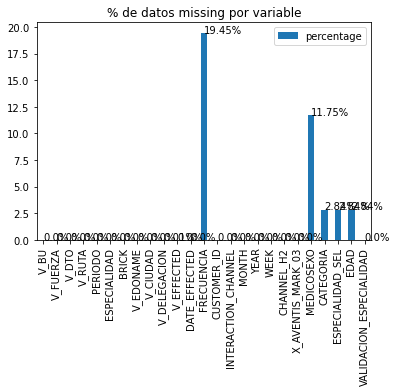

In [24]:
barchart = dfMissing.plot.bar(y='percentage')
plt.title("% de datos missing por variable")

for index, percentage in enumerate(missingPercentage):
    barchart.text(index, percentage, str(percentage) + '%')

## Feature Engineering

Podemos clasificar nuestras variables como categóricas y numéricas:

In [180]:
num_list = []     ### list for numeric variables
cat_list = []     ### list for categorical variables

In [34]:
num_list = []     ### list for numeric variables
cat_list = []     ### list for categorical variables

for column in dfMergeUnicosFinal:
    if ptypes.is_numeric_dtype(dfMergeUnicosFinal[column]):
        num_list.append(column)
    if ptypes.is_string_dtype(dfMergeUnicosFinal[column]):
        cat_list.append(column)
        
print("Numerical variables:")
print(num_list)
print("\n")
print("Categorical Variables:")
print(cat_list)


Numerical variables:
['CUSTOMER_ID', 'FRECUENCIA', 'EDAD']


Categorical Variables:
['V_FUERZA', 'V_DTO', 'V_RUTA', 'V_DELEGACION', 'ESPECIALIDAD', 'BRICK', 'V_EDONAME', 'V_CIUDAD', 'X_AVENTIS_MARK_03', 'CATEGORIA', 'MEDICOSEXO', 'CHANNEL_H2']


Será conveniente también tener un dataframe conformado por nuestras variables categóricas y otro por nuestras variables numéricas:

In [35]:
dfCategoricas = dfMergeUnicosFinal[cat_list]
dfNumericas = dfMergeUnicosFinal[num_list]

Será necesario re-codificar nuestras variables categóricas, es decir, cambiarlas a valores numéricos.

Para empezar, podemos ver que existen algunas variables categóricas que no nos son útiles para el análisis dado que son redundantes con otra variable dentro del mismo dataframe, estas son: 

- 'DATE_EFFECTED'
- 'INTERACTION_CHANNEL'
- y 'ESPECIALIDAD_SEL'

por lo que nos conviene omitirlas en la data:

In [36]:
dfCategoricas.drop(['DATE_EFFECTED', 'INTERACTION_CHANNEL', 'ESPECIALIDAD_SEL'], axis = 1, inplace = True)


KeyError: "['DATE_EFFECTED' 'INTERACTION_CHANNEL' 'ESPECIALIDAD_SEL'] not found in axis"

Del mismo modo, podemos notar que:

- 'X_AVENTIS_MARK_03'
- 'CATEGORIA' 

son variables de tipo ordinal, por lo que conviene más codificarlas acorde.

También la variable 'MEDICOSEXO' es binaria, por lo que será codificada a parte:
    

In [37]:
dfCategoricas['X_AVENTIS_MARK_03'].unique()

array(['A', 'NONE', 'S/C', 'C', 'B'], dtype=object)

In [38]:
dfCategoricas['CATEGORIA'].unique()

array(['A', 'C', 'B', 'S/C'], dtype=object)

In [39]:
dfCategoricas['MEDICOSEXO'].unique()

array(['M', 'F', ' '], dtype=object)

Será conveniente preservar estos catálogos para futuras ocasiones:

In [40]:
dataAventis = {'X_AVENTIS_MARK_03' : ['NONE', 'C', 'B', 'A', 'S/C'],
               'X_AVENTIS_CODE': [0, 1, 2, 3, 0]}

dfXAventis = pd.DataFrame(dataAventis, columns = ['X_AVENTIS_MARK_03', 'X_AVENTIS_CODE'])
dfXAventis.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/CATALOGOS/Catalogo_X_AVENTIS_MARK_03.csv")
dfXAventis

,X_AVENTIS_MARK_03,X_AVENTIS_CODE
0,NONE,0
1,C,1
2,B,2
3,A,3
4,S/C,0


In [41]:
dataCategoria = {'CATEGORIA' : ['S/C', 'B', 'A', 'C'],
               'CATEGORIA_CODE': [0, 2, 3, 1]}

dfCat = pd.DataFrame(dataCategoria, columns = ['CATEGORIA', 'CATEGORIA_CODE'])
dfCat.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/CATALOGOS/Catalogo_CATEGORIA.csv")
dfCat

,CATEGORIA,CATEGORIA_CODE
0,S/C,0
1,B,2
2,A,3
3,C,1


In [42]:
dataMedicoSexo = {'MEDICOSEXO' : ['M', 'F', 'NONE'],
               'MEDICOSEXO_CODE': [1, 2, 0]}

dfMedicoSexo = pd.DataFrame(dataMedicoSexo, columns = ['MEDICOSEXO', 'MEDICOSEXO_CODE'])
dfMedicoSexo.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/CATALOGOS/Catalogo_MEDICOSEXO.csv")
dfMedicoSexo

,MEDICOSEXO,MEDICOSEXO_CODE
0,M,1
1,F,2
2,NONE,0


Es necesario sustituir los valores 'nan' en las variables 'CATEGORIA' y 'MEDICOSEXO', así como el valor ' ' en esta última:

In [43]:
dfMergeUnicosFinal['CATEGORIA'] = dfMergeUnicosFinal['CATEGORIA'].replace(np.nan, 'S/C')
dfMergeUnicosFinal['MEDICOSEXO'] = dfMergeUnicosFinal['MEDICOSEXO'].replace(np.nan, 'NONE')
dfMergeUnicosFinal['MEDICOSEXO'] = dfMergeUnicosFinal['MEDICOSEXO'].replace(' ', 'NONE')

Examinemos la cardinalidad de nuestras variables categoricas:

In [44]:
listCardinalityPlus15 = []     ### list for variables with cardinality > 15

for column in dfCategoricas:
    print(str(column) + " :" + str(len(dfCategoricas[column].unique())))     ### summary of cardinality
    if len(dfCategoricas[column].unique()) > 15:                             ### for loop for filling list
        listCardinalityPlus15.append(column)
        
### Print list with cardinality > 15
print("\n")        
print("Variables with Cardinality > 15: ")
print(listCardinalityPlus15)

V_FUERZA :9
V_DTO :27
V_RUTA :289
V_DELEGACION :1758
ESPECIALIDAD :60
BRICK :5895
V_EDONAME :32
V_CIUDAD :630
X_AVENTIS_MARK_03 :5
CATEGORIA :4
MEDICOSEXO :3
CHANNEL_H2 :4


Variables with Cardinality > 15: 
['V_DTO', 'V_RUTA', 'V_DELEGACION', 'ESPECIALIDAD', 'BRICK', 'V_EDONAME', 'V_CIUDAD']


In [45]:
dfCategoricas['BRICK'].unique()

array([24001080.0, '024001080', '012010001', ..., 1013115.0, '026001041',
       '26001041.0'], dtype=object)

Podemos notar que los 'BRICK' tiene valores mixtos entre números y texto, es conveniente convertirlos completamente a texto, pues nos servirán sólo para etiquetar.

Su valor en número no es representativo de algún orden jerárquico, por lo que también añadiremos una 'B' como prefijo:

In [46]:
dfMergeUnicosFinal['BRICK'] = dfMergeUnicosFinal['BRICK'].astype(str)

In [47]:
dfMergeUnicosFinal['BRICK'] = 'B-' + dfMergeUnicosFinal['BRICK']

Es conveniente añadir a este datframe de categóricas la columna de 'CUSTOMER_ID' para preservar nuestra llave para uniones:

In [48]:
dfMergeUnicosFinal.columns

Index(['CUSTOMER_ID', 'V_FUERZA', 'V_DTO', 'V_RUTA', 'V_DELEGACION',
       'ESPECIALIDAD', 'BRICK', 'V_EDONAME', 'V_CIUDAD', 'X_AVENTIS_MARK_03',
       'CATEGORIA', 'MEDICOSEXO', 'CHANNEL_H2', 'FRECUENCIA', 'EDAD'],
      dtype='object')

In [164]:
dfCategoricas['CUSTOMER_ID'] = dfNumericas['CUSTOMER_ID']

In [165]:
dfCategoricas.columns

Index(['V_FUERZA', 'V_DTO', 'V_RUTA', 'ESPECIALIDAD', 'BRICK', 'V_EDONAME',
       'V_CIUDAD', 'X_AVENTIS_MARK_03', 'CATEGORIA', 'MEDICOSEXO',
       'CUSTOMER_ID', 'X_AVENTIS_CODE', 'CATEGORIA_CODE'],
      dtype='object')

Y ahora construiremos un dataframe consistente en la variables categóricas para las cuales ya creamos un catálogo:

In [41]:
listaCat1 = ['CUSTOMER_ID', 'MEDICOSEXO', 'CATEGORIA', 'X_AVENTIS_MARK_03']

dfCategoricasCatalogo = dfCategoricas[listaCat1]

Sobre este nuevo dataframe podemos tomar los mapeos definidos de nuestros catálogos:

In [49]:
dfMergeUnicosFinal = dfMergeUnicosFinal.merge(dfXAventis, on='X_AVENTIS_MARK_03', how='left')
dfMergeUnicosFinal = dfMergeUnicosFinal.merge(dfCat, on='CATEGORIA', how='left')
dfMergeUnicosFinal = dfMergeUnicosFinal.merge(dfMedicoSexo, on='MEDICOSEXO', how='left')

In [50]:
dfMergeUnicosFinal

,CUSTOMER_ID,V_FUERZA,V_DTO,V_RUTA,V_DELEGACION,ESPECIALIDAD,BRICK,V_EDONAME,V_CIUDAD,X_AVENTIS_MARK_03,CATEGORIA,MEDICOSEXO,CHANNEL_H2,FRECUENCIA,EDAD,X_AVENTIS_CODE,CATEGORIA_CODE,MEDICOSEXO_CODE
0,1007121188,OSTEO,POS001,POS00108,SAN LUIS POTOSI,ORTOPEDISTA TRAUMATOLOGO,B-24001080.0,SAN LUIS POTOSI,SAN LUIS POTOSI [S.L.P.],A,A,M,F2F,12.0,46.0,3,3,1
1,1007121188,OSTEO,POS001,POS00108,SAN LUIS POTOSI,ORTOPEDISTA TRAUMATOLOGO,B-24001080.0,SAN LUIS POTOSI,SAN LUIS POTOSI [S.L.P.],A,A,M,Others,2.0,46.0,3,3,1
2,1007121188,OSTEO,POS001,POS00108,SAN LUIS POTOSI,ORTOPEDISTA TRAUMATOLOGO,B-24001080.0,SAN LUIS POTOSI,SAN LUIS POTOSI [S.L.P.],A,A,M,Phone,28.0,46.0,3,3,1
3,1007121188,OSTEO,POS001,POS00108,SAN LUIS POTOSI,ORTOPEDISTA TRAUMATOLOGO,B-24001080.0,SAN LUIS POTOSI,SAN LUIS POTOSI [S.L.P.],A,A,M,Remote Detailing,2.0,46.0,3,3,1
4,1007121188,OSTEO,POS001,POS00108,SAN LUIS POTOSI,ORTOPEDISTA TRAUMATOLOGO,B-24001080.0,SAN LUIS POTOSI,SAN LUIS POTOSI [S.L.P.],NONE,A,M,F2F,4.0,46.0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237575,1122098000005804,CONECTA WH&CNS,COW001,COW00112,SAN LUIS RIO COLORADO,GINECOLOGO,B-26020001.0,SONORA,SAN LUIS RIO COLORADO [SON.],NONE,S/C,F,Phone,0.0,0.0,0,0,2
237576,1122098000007438,CONECTA WH&CNS,COW001,COW00112,Hermosillo,MEDICO GENERAL,B-26001091.0,SONORA,HERMOSILLO [SON.],NONE,S/C,M,Phone,0.0,0.0,0,0,1
237577,1122098000008439,CONECTA WH&CNS,COW001,COW00112,San Luis Río Colorado,MEDICO GENERAL,B-26020001.0,SONORA,SAN LUIS RIO COLORADO [SON.],NONE,S/C,F,Phone,0.0,0.0,0,0,2
237578,1122098000011866,CONECTA WH&CNS,COW001,COW00112,Cananea,MEDICO GENERAL,B-026050001,SONORA,CANANEA [SON.],NONE,S/C,M,Phone,0.0,0.0,0,0,1


In [51]:
dfMergeUnicosFinal.isnull().sum()

CUSTOMER_ID          0
V_FUERZA             0
V_DTO                0
V_RUTA               0
V_DELEGACION         0
ESPECIALIDAD         0
BRICK                0
V_EDONAME            0
V_CIUDAD             0
X_AVENTIS_MARK_03    0
CATEGORIA            0
MEDICOSEXO           0
CHANNEL_H2           0
FRECUENCIA           0
EDAD                 0
X_AVENTIS_CODE       0
CATEGORIA_CODE       0
MEDICOSEXO_CODE      0
dtype: int64

Creamos dataframe con el resto de las variables:

In [44]:
listaCat2 = ['CUSTOMER_ID', 'V_FUERZA', 'V_DTO', 'V_RUTA', 'ESPECIALIDAD',
             'BRICK', 'V_EDONAME', 'V_CIUDAD', 'V_DELEGACION', 'CHANNEL_H2']

dfCategoricasTarget = dfCategoricas[listaCat2]

In [45]:
dfCategoricasTarget

,CUSTOMER_ID,V_FUERZA,V_DTO,V_RUTA,ESPECIALIDAD,BRICK,V_EDONAME,V_CIUDAD,V_DELEGACION,CHANNEL_H2
0,1007173951,WH&CNS,PCW003,PCW00306,MEDICO GENERAL,B-1001005.0,DISTRITO FEDERAL,CUAUHTEMOC [D.F.],CUAUHTEMOC,Phone
1,1007193626,CONECTA CARDIO,COC001,COC00106,MEDICO GENERAL,B-21001174.0,PUEBLA,PUEBLA [PUE.],PUEBLA,Phone
2,803574000002619,CONECTA CARDIO,COC001,COC00105,MEDICO GENERAL,B-16090001.0,MICHOACAN,VILLAMAR [MICH.],VILLAMAR,Remote Detailing
3,497724000009071,OSTEO,POS003,POS00301,CADENA,B-1013066.0,DISTRITO FEDERAL,IZTAPALAPA [D.F.],IZTAPALAPA,Phone
4,497724000009071,OSTEO,POS003,POS00301,CADENA,B-1013066.0,DISTRITO FEDERAL,IZTAPALAPA [D.F.],IZTAPALAPA,Phone
...,...,...,...,...,...,...,...,...,...,...
707244,1007200351,WH&CNS,PCW003,PCW00303,GINECOLOGO,B-1017030,DISTRITO FEDERAL,MIGUEL HIDALGO [D.F.],MIGUEL HIDALGO,Phone
707245,60000215125668,CONECTA CARDIO,COC001,COC00115,MEDICO GENERAL,B-26001087,SONORA,HERMOSILLO [SON.],HERMOSILLO,Phone
707246,656332000049505,DIABETES,PCD002,PCD00205,MEDICO GENERAL,B-1023032,DISTRITO FEDERAL,TLAHUAC [D.F.],TLAHUAC,Remote Detailing
707247,1007168017,OSTEO,POS003,POS00303,ORTOPEDISTA TRAUMATOLOGO,B-1020128,DISTRITO FEDERAL,TLALPAN [D.F.],TLALPAN,Phone


Para este dataframe será necesario también incorporar la 'FRECUENCIA' de la data de 'VISITAS':

In [46]:
dfFrecuencia = pd.pivot_table(dfMerge, index = ['CUSTOMER_ID'], values = ['FRECUENCIA'], aggfunc = np.sum)

In [47]:
dfFrecuencia = dfFrecuencia.rename_axis(None, axis=1).reset_index()

In [48]:
dfFrecuencia

,CUSTOMER_ID,FRECUENCIA
0,1007097612,4.0
1,1007097667,2.0
2,1007097687,5.0
3,1007097800,0.0
4,1007097833,0.0
...,...,...
39402,1122098000005804,0.0
39403,1122098000007438,0.0
39404,1122098000008439,0.0
39405,1122098000011866,0.0


In [49]:
dfCategoricasTarget = dfCategoricasTarget.merge(dfFrecuencia, on = 'CUSTOMER_ID', how = 'left')

In [50]:
dfCategoricasTarget['FRECUENCIA'] = dfCategoricasTarget['FRECUENCIA'].fillna(0)

In [51]:
dfCategoricasTarget.isnull().sum()

CUSTOMER_ID      0
V_FUERZA         0
V_DTO            0
V_RUTA           0
ESPECIALIDAD    15
BRICK            0
V_EDONAME        0
V_CIUDAD         0
V_DELEGACION    65
CHANNEL_H2       0
FRECUENCIA       0
dtype: int64

## Target Encoding

Para las el otro conjunto de variables categoricas, usaremos  **Target Encoding**, la cual es una técnica de codificación Bayesiana. Este tipo de técnicas usan información de la variable dependiente para re-codificar nuestra data categórica.

En target encoding, calculamos la media de la variable target para cada categoría y reemplazamos la variable categórica con el valor promedio. En el caso de la variable categórica target, la **probabilidad posterior** del target reemplaza a cada categoría.


In [52]:
import category_encoders as ce

### V_FUERZA
targetEncoderFuerza = ce.TargetEncoder(cols = 'V_FUERZA')
fuerzaEncode = targetEncoderFuerza.fit_transform(dfMergeUnicosFinal['V_FUERZA'], dfMergeUnicosFinal['FRECUENCIA'])

### V_DTO
targetEncoderDTO = ce.TargetEncoder(cols = 'V_DTO')
DTOEncode = targetEncoderDTO.fit_transform(dfMergeUnicosFinal['V_DTO'], dfMergeUnicosFinal['FRECUENCIA'])

### V_RUTA
targetEncoderRuta = ce.TargetEncoder(cols = 'V_RUTA')
rutaEncode = targetEncoderRuta.fit_transform(dfMergeUnicosFinal['V_RUTA'], dfMergeUnicosFinal['FRECUENCIA'])

### ESPECIALIDAD
targetEncoderEspecialidad = ce.TargetEncoder(cols = 'ESPECIALIDAD')
especialidadEncode = targetEncoderEspecialidad.fit_transform(dfMergeUnicosFinal['ESPECIALIDAD'], dfMergeUnicosFinal['FRECUENCIA'])

### BRICK
targetEncoderBrick = ce.TargetEncoder(cols = 'BRICK')
brickEncode = targetEncoderBrick.fit_transform(dfMergeUnicosFinal['BRICK'], dfMergeUnicosFinal['FRECUENCIA'])

### V_EDONAME
targetEncoderEdoname = ce.TargetEncoder(cols = 'V_EDONAME')
edonameEncode = targetEncoderEdoname.fit_transform(dfMergeUnicosFinal['V_EDONAME'], dfMergeUnicosFinal['FRECUENCIA'])

### V_CIUDAD
targetEncoderCiudad = ce.TargetEncoder(cols = 'V_CIUDAD')
ciudadEncode = targetEncoderCiudad.fit_transform(dfMergeUnicosFinal['V_CIUDAD'], dfMergeUnicosFinal['FRECUENCIA'])

### CHANNEL_H2
targetEncoderChannel = ce.TargetEncoder(cols = 'CHANNEL_H2')
channelEncode = targetEncoderChannel.fit_transform(dfMergeUnicosFinal['CHANNEL_H2'], dfMergeUnicosFinal['FRECUENCIA'])

C:\Users\I0473941\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\I0473941\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\I0473941\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\I0473941\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\I0473941\Anaconda3\lib\site-packages\ca

In [53]:
print("Encode de V_FUERZA: " + str(len(fuerzaEncode)))
print("Encode de V_DTO: " + str(len(DTOEncode)))
print("Encode de V_RUTA: " + str(len(rutaEncode)))
print("Encode de ESPECIALIDAD: " + str(len(especialidadEncode)))
print("Encode de BRICK: " + str(len(brickEncode)))
print("Encode de V_EDONAME: " + str(len(edonameEncode)))
print("Encode de V_CIUDAD: " + str(len(ciudadEncode)))
print("Encode de CHANNEL_H2: " + str(len(channelEncode)))

Encode de V_FUERZA: 237580
Encode de V_DTO: 237580
Encode de V_RUTA: 237580
Encode de ESPECIALIDAD: 237580
Encode de BRICK: 237580
Encode de V_EDONAME: 237580
Encode de V_CIUDAD: 237580
Encode de CHANNEL_H2: 237580


Ahora formaremos un dataframe que esté hecho de las versiones codificadas de nuestras variables:

In [54]:
dfEncodedNominal = pd.concat([fuerzaEncode, DTOEncode, rutaEncode,
                       especialidadEncode, brickEncode, edonameEncode,
                       ciudadEncode, channelEncode], axis = 1)

In [55]:
dfEncodedNominal

,V_FUERZA,V_DTO,V_RUTA,ESPECIALIDAD,BRICK,V_EDONAME,V_CIUDAD,CHANNEL_H2
0,2.702339,2.431288,3.03125,3.312270,3.706897,2.905749,3.046455,1.740309
1,2.702339,2.431288,3.03125,3.312270,3.706897,2.905749,3.046455,1.926636
2,2.702339,2.431288,3.03125,3.312270,3.706897,2.905749,3.046455,2.726660
3,2.702339,2.431288,3.03125,3.312270,3.706897,2.905749,3.046455,1.855505
4,2.702339,2.431288,3.03125,3.312270,3.706897,2.905749,3.046455,1.740309
...,...,...,...,...,...,...,...,...
237575,0.813077,0.737274,1.15942,1.777754,3.285714,1.988632,2.402685,2.726660
237576,0.813077,0.737274,1.15942,2.106185,2.731707,1.988632,2.227970,2.726660
237577,0.813077,0.737274,1.15942,2.106185,3.285714,1.988632,2.402685,2.726660
237578,0.813077,0.737274,1.15942,2.106185,0.666695,1.988632,0.703704,2.726660


Ahora uniremos nuestra columna de 'CUSTOMER_ID' y la codificación de nuestras variables ordinales:

In [56]:
dfEncodedCategorical = pd.concat([dfEncodedNominal,
                                  dfMergeUnicosFinal['CUSTOMER_ID'],
                                  dfMergeUnicosFinal['FRECUENCIA'],
                                  dfMergeUnicosFinal['EDAD'],
                                  dfMergeUnicosFinal['X_AVENTIS_CODE'],
                                  dfMergeUnicosFinal['CATEGORIA_CODE'], 
                                  dfMergeUnicosFinal['MEDICOSEXO_CODE']], axis = 1)

In [76]:
dfEncodedCategorical = pd.concat([dfEncodedNominal,
                                  dfCategoricasCatalogo['CUSTOMER_ID'],
                                  dfCategoricasCatalogo['X_AVENTIS_CODE'],
                                  dfCategoricasCatalogo['CATEGORIA_CODE'],
                                  dfCategoricasCatalogo['MEDICOSEXO_CODE'],
                                  dfMerge['FRECUENCIA'],
                                  dfMerge['EDAD']], axis = 1)

In [57]:
dfEncodedCategorical

,V_FUERZA,V_DTO,V_RUTA,ESPECIALIDAD,BRICK,V_EDONAME,V_CIUDAD,CHANNEL_H2,CUSTOMER_ID,FRECUENCIA,EDAD,X_AVENTIS_CODE,CATEGORIA_CODE,MEDICOSEXO_CODE
0,2.702339,2.431288,3.03125,3.312270,3.706897,2.905749,3.046455,1.740309,1007121188,12.0,46.0,3,3,1
1,2.702339,2.431288,3.03125,3.312270,3.706897,2.905749,3.046455,1.926636,1007121188,2.0,46.0,3,3,1
2,2.702339,2.431288,3.03125,3.312270,3.706897,2.905749,3.046455,2.726660,1007121188,28.0,46.0,3,3,1
3,2.702339,2.431288,3.03125,3.312270,3.706897,2.905749,3.046455,1.855505,1007121188,2.0,46.0,3,3,1
4,2.702339,2.431288,3.03125,3.312270,3.706897,2.905749,3.046455,1.740309,1007121188,4.0,46.0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237575,0.813077,0.737274,1.15942,1.777754,3.285714,1.988632,2.402685,2.726660,1122098000005804,0.0,0.0,0,0,2
237576,0.813077,0.737274,1.15942,2.106185,2.731707,1.988632,2.227970,2.726660,1122098000007438,0.0,0.0,0,0,1
237577,0.813077,0.737274,1.15942,2.106185,3.285714,1.988632,2.402685,2.726660,1122098000008439,0.0,0.0,0,0,2
237578,0.813077,0.737274,1.15942,2.106185,0.666695,1.988632,0.703704,2.726660,1122098000011866,0.0,0.0,0,0,1


In [58]:
dfEncodedCategorical.shape

(237580, 14)

In [59]:
dfEncodedCategorical.columns

Index(['V_FUERZA', 'V_DTO', 'V_RUTA', 'ESPECIALIDAD', 'BRICK', 'V_EDONAME',
       'V_CIUDAD', 'CHANNEL_H2', 'CUSTOMER_ID', 'FRECUENCIA', 'EDAD',
       'X_AVENTIS_CODE', 'CATEGORIA_CODE', 'MEDICOSEXO_CODE'],
      dtype='object')

Exportamos nuestra data:

In [71]:
dfEncodedCategorical.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/Visitas_Encoded.csv")

## STDEV Clustering

Esta técnica de clustering está compuesta de los siguientes pasos:

1. Determinar **desviación standard** de nuestros datos categóricos recodificados

2. Basándonos en la desviación, daremos mayor peso a las variables en las que esta métrica sea más grande

3. Formaremos grupos para clustering visualizado por dispersión / burbujas

In [60]:
stdevs = []    ### Lista que contendrá las desviaciones estándar

### loop que calcula la stdev para cada columna del dataframe
for columna in dfEncodedCategorical:
    stdevs.append(dfEncodedCategorical[columna].std())

columnasStdev = ['Variable', 'STDEV']     ### nombres de las columnas   

### data para llenar dataframe de stdevs
dataStdev = {'Variable' : dfEncodedCategorical.columns,
               'STDEV': stdevs}

### Creamos dataframe con stdevs
dfStdev = pd.DataFrame(dataStdev, columns = columnasStdev)

dfStdev

,Variable,STDEV
0,V_FUERZA,8.134215e-01
1,V_DTO,9.271915e-01
2,V_RUTA,1.298161e+00
3,ESPECIALIDAD,4.701641e-01
4,BRICK,9.747052e-01
5,V_EDONAME,2.398489e-01
6,V_CIUDAD,4.440403e-01
7,CHANNEL_H2,4.512262e-01
8,CUSTOMER_ID,3.679936e+14
9,FRECUENCIA,3.998428e+00


Formaremos grupos de nuestras categorías para determinar los pesos, por la naturaleza de nuestra data estos serán:

- Geografía:
    - V_DTO
    - V_RUTA
    - BRICK
    - V_EDONAME
    - V_CIUDAD


- Data Personal:
    - ESPECIALIDAD
    - MEDICOSEXO_CODE
    - EDAD
    
 
- Data Comercial:
    - V_FUERZA
    - X_AVENTIS_CODE
    - CATEGORIA_CODE
    - FRECUENCIA*
    - CHANNEL_H2
    

La variable de 'CUSTOMER_ID' nos servirá para identificar a nuestros médicos, mientras que la 'FRECUENCIA' podrá servirnos par dar tamaño a las burbujas. 

**Nota:** Un modelo alterno puede contemplar 'FRECUENCIA' como una variable de Data Comercial.

In [61]:
dfGeograficas = dfStdev[dfStdev['Variable'].isin(['V_DTO', 'V_RUTA', 'BRICK', 'V_EDONAME', 'V_CIUDAD'])]
dfPersonal = dfStdev[dfStdev['Variable'].isin(['ESPECIALIDAD', 'MEDICOSEXO_CODE', 'EDAD'])]

### Para esta puede añadirse la variable FRECUENCIA
dfComercial = dfStdev[dfStdev['Variable'].isin(['V_FUERZA', 'X_AVENTIS_CODE', 'CATEGORIA_CODE', 'CHANNEL_H2'])]

In [62]:
dfGeograficasSort = dfGeograficas.sort_values('STDEV', ascending = False)
dfPersonalSort = dfPersonal.sort_values('STDEV', ascending = False)
dfComercialSort = dfComercial.sort_values('STDEV', ascending = False)

Para asignar los pesos, se usará la siguiente fórmula:

$$ w_{i} = \frac{STDEV_{i}}{\Sigma^{N}_{i}STDEV_{i}}$$

donde:

- $N$ es la cardinalidad del dataframe

- $STDEV_{i}$ es tomado del dataframe ordenado de manera descendente $\forall i \in {1, ..., N}$

In [63]:
dfGeograficasSort

,Variable,STDEV
2,V_RUTA,1.298161
4,BRICK,0.974705
1,V_DTO,0.927192
6,V_CIUDAD,0.444040
5,V_EDONAME,0.239849


Determinamos $N$ para cada dataframe:

In [64]:
stdevTotalGeograficas = dfGeograficasSort['STDEV'].sum()
stdevTotalPersonal = dfPersonalSort['STDEV'].sum()
stdevTotalComercial = dfComercialSort['STDEV'].sum()

In [65]:
dfGeograficasSort['WEIGHT'] = dfGeograficasSort['STDEV'] / stdevTotalGeograficas
dfPersonalSort['WEIGHT'] = dfPersonalSort['STDEV'] / stdevTotalPersonal
dfComercialSort['WEIGHT'] = dfComercialSort['STDEV'] / stdevTotalComercial

In [66]:
dfGeograficasSort

,Variable,STDEV,WEIGHT
2,V_RUTA,1.298161,0.334238
4,BRICK,0.974705,0.250957
1,V_DTO,0.927192,0.238724
6,V_CIUDAD,0.444040,0.114327
5,V_EDONAME,0.239849,0.061754


In [67]:
dfPersonalSort

,Variable,STDEV,WEIGHT
10,EDAD,21.745114,0.959262
3,ESPECIALIDAD,0.470164,0.020741
13,MEDICOSEXO_CODE,0.453312,0.019997


In [68]:
dfComercialSort

,Variable,STDEV,WEIGHT
11,X_AVENTIS_CODE,1.187361,0.357610
12,CATEGORIA_CODE,0.868261,0.261503
0,V_FUERZA,0.813422,0.244987
7,CHANNEL_H2,0.451226,0.135900


Será necesario convertir nuestras variables a 'z-scores' para posteriormente aplicar las ponderaciones:

$$zscore = \frac{x_{i} - \mu_{variable}}{\sigma_{variable}}$$

Donde:

- $x_{i}$ es el valor de la variable en el registro $i$

- $\mu_{variable}$ es la media de la variable

- $\sigma_{variable}$ es la desviación estándar de la variable

In [69]:
dfNormalized = (dfEncodedCategorical - dfEncodedCategorical.mean()) / dfEncodedCategorical.std()

In [70]:
dfNormalized.head()

,V_FUERZA,V_DTO,V_RUTA,ESPECIALIDAD,BRICK,V_EDONAME,V_CIUDAD,CHANNEL_H2,CUSTOMER_ID,FRECUENCIA,EDAD,X_AVENTIS_CODE,CATEGORIA_CODE,MEDICOSEXO_CODE
0,0.40777,0.0654,0.508874,2.002711,1.367865,2.230984,1.52116,-1.396950,-0.715236,2.408284,0.012657,1.628178,1.216595,-0.621795
1,0.40777,0.0654,0.508874,2.002711,1.367865,2.230984,1.52116,-0.984015,-0.715236,-0.092699,0.012657,1.628178,1.216595,-0.621795
2,0.40777,0.0654,0.508874,2.002711,1.367865,2.230984,1.52116,0.788984,-0.715236,6.409857,0.012657,1.628178,1.216595,-0.621795
3,0.40777,0.0654,0.508874,2.002711,1.367865,2.230984,1.52116,-1.141655,-0.715236,-0.092699,0.012657,1.628178,1.216595,-0.621795
4,0.40777,0.0654,0.508874,2.002711,1.367865,2.230984,1.52116,-1.396950,-0.715236,0.407498,0.012657,-0.898434,1.216595,-0.621795


Nótese que 'CUSTOMER_ID' también fue estandarizado, pero no era necesario. Por esta razón, quitaremos la columna del dataframe normalizado y la sustituiremos con la columna original:

In [72]:
dfNormalized.drop(['CUSTOMER_ID'], axis = 1, inplace = True)

In [73]:
dfNormalized.columns

Index(['V_FUERZA', 'V_DTO', 'V_RUTA', 'ESPECIALIDAD', 'BRICK', 'V_EDONAME',
       'V_CIUDAD', 'CHANNEL_H2', 'FRECUENCIA', 'EDAD', 'X_AVENTIS_CODE',
       'CATEGORIA_CODE', 'MEDICOSEXO_CODE'],
      dtype='object')

Mismo caso para la 'FRECUENCIA':

In [74]:
dfNormalized.drop(['FRECUENCIA'], axis = 1, inplace = True)

In [75]:
dfNormalized.columns

Index(['V_FUERZA', 'V_DTO', 'V_RUTA', 'ESPECIALIDAD', 'BRICK', 'V_EDONAME',
       'V_CIUDAD', 'CHANNEL_H2', 'EDAD', 'X_AVENTIS_CODE', 'CATEGORIA_CODE',
       'MEDICOSEXO_CODE'],
      dtype='object')

In [76]:
dfNormalizedID = pd.concat([dfNormalized,
                            dfEncodedCategorical['CUSTOMER_ID'],
                            dfEncodedCategorical['FRECUENCIA']], axis = 1)

In [77]:
dfNormalizedID

,V_FUERZA,V_DTO,V_RUTA,ESPECIALIDAD,BRICK,V_EDONAME,V_CIUDAD,CHANNEL_H2,EDAD,X_AVENTIS_CODE,CATEGORIA_CODE,MEDICOSEXO_CODE,CUSTOMER_ID,FRECUENCIA
0,0.407770,0.065400,0.508874,2.002711,1.367865,2.230984,1.521160,-1.396950,0.012657,1.628178,1.216595,-0.621795,1007121188,12.0
1,0.407770,0.065400,0.508874,2.002711,1.367865,2.230984,1.521160,-0.984015,0.012657,1.628178,1.216595,-0.621795,1007121188,2.0
2,0.407770,0.065400,0.508874,2.002711,1.367865,2.230984,1.521160,0.788984,0.012657,1.628178,1.216595,-0.621795,1007121188,28.0
3,0.407770,0.065400,0.508874,2.002711,1.367865,2.230984,1.521160,-1.141655,0.012657,1.628178,1.216595,-0.621795,1007121188,2.0
4,0.407770,0.065400,0.508874,2.002711,1.367865,2.230984,1.521160,-1.396950,0.012657,-0.898434,1.216595,-0.621795,1007121188,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237575,-1.914841,-1.761638,-0.933035,-1.261076,0.935752,-1.592745,0.071359,0.788984,-2.102761,-0.898434,-2.238587,1.584192,1122098000005804,0.0
237576,-1.914841,-1.761638,-0.933035,-0.562531,0.367368,-1.592745,-0.322107,0.788984,-2.102761,-0.898434,-2.238587,-0.621795,1122098000007438,0.0
237577,-1.914841,-1.761638,-0.933035,-0.562531,0.935752,-1.592745,0.071359,0.788984,-2.102761,-0.898434,-2.238587,1.584192,1122098000008439,0.0
237578,-1.914841,-1.761638,-0.933035,-0.562531,-1.751234,-1.592745,-3.754827,0.788984,-2.102761,-0.898434,-2.238587,-0.621795,1122098000011866,0.0


In [78]:
dfComercialSort

,Variable,STDEV,WEIGHT
11,X_AVENTIS_CODE,1.187361,0.357610
12,CATEGORIA_CODE,0.868261,0.261503
0,V_FUERZA,0.813422,0.244987
7,CHANNEL_H2,0.451226,0.135900


In [79]:
### Weights para variables Geográficas
rutaWeight = dfGeograficasSort['WEIGHT'].iloc[0]
brickWeight = dfGeograficasSort['WEIGHT'].iloc[1]
DTOWeight = dfGeograficasSort['WEIGHT'].iloc[2]
ciudadWeight = dfGeograficasSort['WEIGHT'].iloc[3]
edonameWeight = dfGeograficasSort['WEIGHT'].iloc[4]

### Weights para variables Personal
edadWeight = dfPersonalSort['WEIGHT'].iloc[0]
especialidadWeight = dfPersonalSort['WEIGHT'].iloc[1]
medicosexoWeight = dfPersonalSort['WEIGHT'].iloc[2]

### Weights para variables Comercial
#frecuenciaWeight = dfComercialSort['WEIGHT'].iloc[0]
xaventisWeight = dfComercialSort['WEIGHT'].iloc[0]
categoriaWeight = dfComercialSort['WEIGHT'].iloc[1]
fuerzaWeight = dfComercialSort['WEIGHT'].iloc[2]
channelWeight = dfComercialSort['WEIGHT'].iloc[3]

In [269]:
print("Peso de V_RUTA: " + str(rutaWeight))

Peso de V_RUTA: 0.3342375798346016


Multiplicamos las columnas por sus respectivos pesos:

In [80]:
dfNormalizedID['Z_RUTA'] = dfNormalizedID['V_RUTA'] * rutaWeight
dfNormalizedID['Z_BRICK'] = dfNormalizedID['BRICK'] * brickWeight
dfNormalizedID['Z_DTO'] = dfNormalizedID['V_DTO'] * DTOWeight
dfNormalizedID['Z_CIUDAD'] = dfNormalizedID['V_CIUDAD'] * ciudadWeight
dfNormalizedID['Z_EDONAME'] = dfNormalizedID['V_EDONAME'] * edonameWeight
dfNormalizedID['Z_EDAD'] = dfNormalizedID['EDAD'] * edadWeight
dfNormalizedID['Z_ESPECIALIDAD'] = dfNormalizedID['ESPECIALIDAD'] * especialidadWeight
dfNormalizedID['Z_MEDICOSEXO'] = dfNormalizedID['MEDICOSEXO_CODE'] * medicosexoWeight
#dfNormalizedID['Z_FRECUENCIA'] = dfNormalizedID['FRECUENCIA'] * frecuenciaWeight
dfNormalizedID['Z_X_AVENTIS'] = dfNormalizedID['X_AVENTIS_CODE'] * xaventisWeight
dfNormalizedID['Z_CATEGORIA'] = dfNormalizedID['CATEGORIA_CODE'] * categoriaWeight
dfNormalizedID['Z_FUERZA'] = dfNormalizedID['V_FUERZA'] * fuerzaWeight
dfNormalizedID['Z_CHANNEL'] = dfNormalizedID['CHANNEL_H2'] * channelWeight

In [81]:
dfNormalizedID

,V_FUERZA,V_DTO,V_RUTA,ESPECIALIDAD,BRICK,V_EDONAME,V_CIUDAD,CHANNEL_H2,EDAD,X_AVENTIS_CODE,...,Z_DTO,Z_CIUDAD,Z_EDONAME,Z_EDAD,Z_ESPECIALIDAD,Z_MEDICOSEXO,Z_X_AVENTIS,Z_CATEGORIA,Z_FUERZA,Z_CHANNEL
0,0.407770,0.065400,0.508874,2.002711,1.367865,2.230984,1.521160,-1.396950,0.012657,1.628178,...,0.015613,0.173910,0.137772,0.012141,0.041538,-0.012434,0.582252,0.318143,0.099898,-0.189846
1,0.407770,0.065400,0.508874,2.002711,1.367865,2.230984,1.521160,-0.984015,0.012657,1.628178,...,0.015613,0.173910,0.137772,0.012141,0.041538,-0.012434,0.582252,0.318143,0.099898,-0.133728
2,0.407770,0.065400,0.508874,2.002711,1.367865,2.230984,1.521160,0.788984,0.012657,1.628178,...,0.015613,0.173910,0.137772,0.012141,0.041538,-0.012434,0.582252,0.318143,0.099898,0.107223
3,0.407770,0.065400,0.508874,2.002711,1.367865,2.230984,1.521160,-1.141655,0.012657,1.628178,...,0.015613,0.173910,0.137772,0.012141,0.041538,-0.012434,0.582252,0.318143,0.099898,-0.155151
4,0.407770,0.065400,0.508874,2.002711,1.367865,2.230984,1.521160,-1.396950,0.012657,-0.898434,...,0.015613,0.173910,0.137772,0.012141,0.041538,-0.012434,-0.321289,0.318143,0.099898,-0.189846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237575,-1.914841,-1.761638,-0.933035,-1.261076,0.935752,-1.592745,0.071359,0.788984,-2.102761,-0.898434,...,-0.420545,0.008158,-0.098358,-2.017098,-0.026156,0.031680,-0.321289,-0.585398,-0.469110,0.107223
237576,-1.914841,-1.761638,-0.933035,-0.562531,0.367368,-1.592745,-0.322107,0.788984,-2.102761,-0.898434,...,-0.420545,-0.036826,-0.098358,-2.017098,-0.011667,-0.012434,-0.321289,-0.585398,-0.469110,0.107223
237577,-1.914841,-1.761638,-0.933035,-0.562531,0.935752,-1.592745,0.071359,0.788984,-2.102761,-0.898434,...,-0.420545,0.008158,-0.098358,-2.017098,-0.011667,0.031680,-0.321289,-0.585398,-0.469110,0.107223
237578,-1.914841,-1.761638,-0.933035,-0.562531,-1.751234,-1.592745,-3.754827,0.788984,-2.102761,-0.898434,...,-0.420545,-0.429278,-0.098358,-2.017098,-0.011667,-0.012434,-0.321289,-0.585398,-0.469110,0.107223


In [82]:
dfNormalizedID.columns

Index(['V_FUERZA', 'V_DTO', 'V_RUTA', 'ESPECIALIDAD', 'BRICK', 'V_EDONAME',
       'V_CIUDAD', 'CHANNEL_H2', 'EDAD', 'X_AVENTIS_CODE', 'CATEGORIA_CODE',
       'MEDICOSEXO_CODE', 'CUSTOMER_ID', 'FRECUENCIA', 'Z_RUTA', 'Z_BRICK',
       'Z_DTO', 'Z_CIUDAD', 'Z_EDONAME', 'Z_EDAD', 'Z_ESPECIALIDAD',
       'Z_MEDICOSEXO', 'Z_X_AVENTIS', 'Z_CATEGORIA', 'Z_FUERZA', 'Z_CHANNEL'],
      dtype='object')

Ahora calcularemos el score final para nuestros clusters:

In [83]:
dfNormalizedID['SCORE_GEO'] = dfNormalizedID['Z_RUTA'] + dfNormalizedID['Z_BRICK'] + dfNormalizedID['Z_DTO'] + dfNormalizedID['Z_CIUDAD'] + dfNormalizedID['Z_EDONAME']

dfNormalizedID['SCORE_PERSONAL'] = dfNormalizedID['Z_EDAD'] + dfNormalizedID['Z_ESPECIALIDAD'] + dfNormalizedID['Z_MEDICOSEXO']

### Se puede sumar dfNormalizedID['Z_FRECUENCIA']
dfNormalizedID['SCORE_COMERCIAL'] =  dfNormalizedID['Z_X_AVENTIS'] + dfNormalizedID['Z_CATEGORIA'] + dfNormalizedID['Z_FUERZA'] + dfNormalizedID['Z_CHANNEL']

In [84]:
dfNormalizedID

,V_FUERZA,V_DTO,V_RUTA,ESPECIALIDAD,BRICK,V_EDONAME,V_CIUDAD,CHANNEL_H2,EDAD,X_AVENTIS_CODE,...,Z_EDAD,Z_ESPECIALIDAD,Z_MEDICOSEXO,Z_X_AVENTIS,Z_CATEGORIA,Z_FUERZA,Z_CHANNEL,SCORE_GEO,SCORE_PERSONAL,SCORE_COMERCIAL
0,0.407770,0.065400,0.508874,2.002711,1.367865,2.230984,1.521160,-1.396950,0.012657,1.628178,...,0.012141,0.041538,-0.012434,0.582252,0.318143,0.099898,-0.189846,0.840655,0.041245,0.810448
1,0.407770,0.065400,0.508874,2.002711,1.367865,2.230984,1.521160,-0.984015,0.012657,1.628178,...,0.012141,0.041538,-0.012434,0.582252,0.318143,0.099898,-0.133728,0.840655,0.041245,0.866566
2,0.407770,0.065400,0.508874,2.002711,1.367865,2.230984,1.521160,0.788984,0.012657,1.628178,...,0.012141,0.041538,-0.012434,0.582252,0.318143,0.099898,0.107223,0.840655,0.041245,1.107517
3,0.407770,0.065400,0.508874,2.002711,1.367865,2.230984,1.521160,-1.141655,0.012657,1.628178,...,0.012141,0.041538,-0.012434,0.582252,0.318143,0.099898,-0.155151,0.840655,0.041245,0.845143
4,0.407770,0.065400,0.508874,2.002711,1.367865,2.230984,1.521160,-1.396950,0.012657,-0.898434,...,0.012141,0.041538,-0.012434,-0.321289,0.318143,0.099898,-0.189846,0.840655,0.041245,-0.093093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237575,-1.914841,-1.761638,-0.933035,-1.261076,0.935752,-1.592745,0.071359,0.788984,-2.102761,-0.898434,...,-2.017098,-0.026156,0.031680,-0.321289,-0.585398,-0.469110,0.107223,-0.587767,-2.011575,-1.268573
237576,-1.914841,-1.761638,-0.933035,-0.562531,0.367368,-1.592745,-0.322107,0.788984,-2.102761,-0.898434,...,-2.017098,-0.011667,-0.012434,-0.321289,-0.585398,-0.469110,0.107223,-0.775391,-2.041200,-1.268573
237577,-1.914841,-1.761638,-0.933035,-0.562531,0.935752,-1.592745,0.071359,0.788984,-2.102761,-0.898434,...,-2.017098,-0.011667,0.031680,-0.321289,-0.585398,-0.469110,0.107223,-0.587767,-1.997086,-1.268573
237578,-1.914841,-1.761638,-0.933035,-0.562531,-1.751234,-1.592745,-3.754827,0.788984,-2.102761,-0.898434,...,-2.017098,-0.011667,-0.012434,-0.321289,-0.585398,-0.469110,0.107223,-1.699522,-2.041200,-1.268573


In [85]:
dfNormalizedID.columns

Index(['V_FUERZA', 'V_DTO', 'V_RUTA', 'ESPECIALIDAD', 'BRICK', 'V_EDONAME',
       'V_CIUDAD', 'CHANNEL_H2', 'EDAD', 'X_AVENTIS_CODE', 'CATEGORIA_CODE',
       'MEDICOSEXO_CODE', 'CUSTOMER_ID', 'FRECUENCIA', 'Z_RUTA', 'Z_BRICK',
       'Z_DTO', 'Z_CIUDAD', 'Z_EDONAME', 'Z_EDAD', 'Z_ESPECIALIDAD',
       'Z_MEDICOSEXO', 'Z_X_AVENTIS', 'Z_CATEGORIA', 'Z_FUERZA', 'Z_CHANNEL',
       'SCORE_GEO', 'SCORE_PERSONAL', 'SCORE_COMERCIAL'],
      dtype='object')

Exportamos nuestra data:

In [86]:
dfNormalizedID.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/Visitas_Normalized_Score.csv")

## Scatter Plots

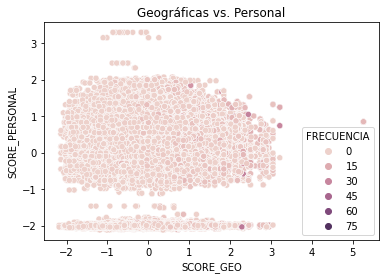

In [88]:
sns.scatterplot(data=dfNormalizedID, x="SCORE_GEO", y="SCORE_PERSONAL", hue='FRECUENCIA')
plt.title("Geográficas vs. Personal")
plt.savefig("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/PLOTS/CLUSTERING/Cluster_Geo_Personal.png")
#plt.show()

<ipython-input-89-c6ae2050cb58>:3: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/PLOTS/CLUSTERING/Cluster_Geo_Comercial.png")
C:\Users\I0473941\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


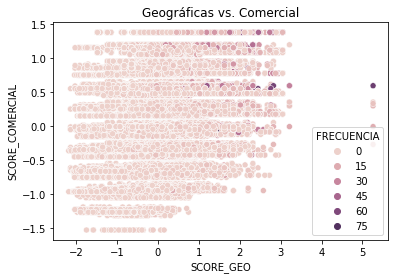

In [89]:
sns.scatterplot(data=dfNormalizedID, x="SCORE_GEO", y="SCORE_COMERCIAL", hue='FRECUENCIA')
plt.title("Geográficas vs. Comercial")
plt.savefig("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/PLOTS/CLUSTERING/Cluster_Geo_Comercial.png")


<ipython-input-90-9ef0de02205f>:3: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/PLOTS/CLUSTERING/Cluster_Personal_Comercial.png")
C:\Users\I0473941\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


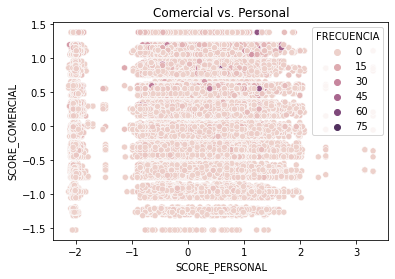

In [90]:
sns.scatterplot(data=dfNormalizedID, x="SCORE_PERSONAL", y="SCORE_COMERCIAL", hue='FRECUENCIA')
plt.title("Comercial vs. Personal")
plt.savefig("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/PLOTS/CLUSTERING/Cluster_Personal_Comercial.png")


### Scatter Plot 3D

In [282]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = dfNormalizedID['SCORE_GEO']
y = dfNormalizedID['SCORE_PERSONAL']
z = dfNormalizedID['SCORE_COMERCIAL']

ax.set_xlabel("Geografía")
ax.set_ylabel("Personal")
ax.set_zlabel("Comercial")

ax.scatter(x, y, z, c=dfNormalizedID['FRECUENCIA'])

plt.show()

<IPython.core.display.Javascript object>

Mediante este método de clustering, tenemos los siguientes **hallazgos**:
    
Sobre vector **PERSONAL**:
- $2$ clusters atípicos, uno mayor a $2$ y otro en el nivel menor a $-1$

Sobre vector **GEOGRÁFICO**:
- $1$ cluster atípico, mayor a $5$

Sobre vector **COMERCIAL**:
- Por arriba del nivel $0.5$ se observan grandes acumulaciones de FRECUENCIA

Conviene observar a myor detalle qué pasa con la FRECUENCIA:

C:\Users\I0473941\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FRECUENCIA', ylabel='Density'>

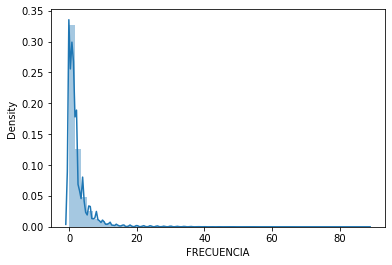

In [91]:
sns.distplot(dfNormalizedID['FRECUENCIA'])

In [93]:
dfNormalizedID['FRECUENCIA'].describe()

count    237580.000000
mean          2.370650
std           3.998428
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          88.000000
Name: FRECUENCIA, dtype: float64

Es posible notar que hay un fuerte sezgo de la FRECUENCIA hacia valores bajos, pues la media es de apenas 2.37 y 75% de nuestros datos se encuentran en un nivel menor a 3.

A pesar de esto, nos es posible clasificar a los médicos con respecto a las posiciones observadas en nuestros vectores.

Empezamos con el cluster de médicos con vector PERSONAL > 2.1:

In [124]:
dfMedicosPersonalUpper = dfNormalizedID[dfNormalizedID['SCORE_PERSONAL'] > 2.1]
dfMedicosPersonalUpper = pd.pivot_table(dfMedicosPersonalUpper,
                                        index = ['CUSTOMER_ID'],
                                        values = ['FRECUENCIA',
                                                  'SCORE_GEO',
                                                  'SCORE_PERSONAL', 'SCORE_COMERCIAL'],
                                        aggfunc = np.sum)
dfMedicosPersonalUpper = dfMedicosPersonalUpper.rename_axis(None, axis=1).reset_index()
dfMedicosPersonalUpper.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/Medicos_Cluster_Personal_Upper.csv")

dfSDClusterPersonalUpper = dfMedicosPersonalUpper.merge(dfMergeUnicosFinal,
                                                        on = "CUSTOMER_ID", how = 'left')
dfSDClusterPersonalUpper.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/Medicos_Complete_Personal_Upper.csv")

dfMedicosPersonalUpper

,CUSTOMER_ID,FRECUENCIA,SCORE_COMERCIAL,SCORE_GEO,SCORE_PERSONAL
0,1007135435,4.0,-3.188079,-5.384734,26.372658
1,1007148032,20.0,5.028347,-0.810920,29.669240
2,1007170745,3.0,-3.286714,-2.878527,18.898513
3,1007173265,1.0,-1.209793,-0.661617,4.643285
4,849567000000642,9.0,2.935967,-10.717388,41.723662


Médicos con valores en PERSONAL < -1

In [125]:
dfMedicosPersonalLower = dfNormalizedID[dfNormalizedID['SCORE_PERSONAL'] < -1]
dfMedicosPersonalLower = pd.pivot_table(dfMedicosPersonalLower,
                                        index = ['CUSTOMER_ID'],
                                        values = ['FRECUENCIA',
                                                  'SCORE_GEO',
                                                  'SCORE_PERSONAL', 'SCORE_COMERCIAL'],
                                        aggfunc = np.sum)
dfMedicosPersonalLower = dfMedicosPersonalLower.rename_axis(None, axis=1).reset_index()
dfMedicosPersonalLower.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/Medicos_Cluster_Personal_Lower.csv")

dfSDClusterPersonalLower = dfMedicosPersonalLower.merge(dfMergeUnicosFinal,
                                                        on = "CUSTOMER_ID", how = 'left')
dfSDClusterPersonalLower.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/Medicos_Complete_Personal_Lower.csv")

dfMedicosPersonalLower

,CUSTOMER_ID,FRECUENCIA,SCORE_COMERCIAL,SCORE_GEO,SCORE_PERSONAL
0,1007122079,9.0,2.267519,1.758390,-9.769981
1,1007125706,53.0,0.949155,9.602814,-35.890136
2,1007126350,6.0,-0.378407,0.513209,-5.758460
3,1007127226,3.0,0.761975,-0.538521,-6.123600
4,1007131201,7.0,-3.132485,-2.850949,-15.976689
...,...,...,...,...,...
5715,1122098000005804,0.0,-1.268573,-0.587767,-2.011575
5716,1122098000007438,0.0,-1.268573,-0.775391,-2.041200
5717,1122098000008439,0.0,-1.268573,-0.587767,-1.997086
5718,1122098000011866,0.0,-1.268573,-1.699522,-2.041200


Médicos con valores en vector GEOGRÁFICO > 5:

In [126]:
dfMedicosGeo = dfNormalizedID[dfNormalizedID['SCORE_GEO'] > 5]
dfMedicosGeo = pd.pivot_table(dfMedicosGeo,
                                        index = ['CUSTOMER_ID'],
                                        values = ['FRECUENCIA',
                                                  'SCORE_GEO',
                                                  'SCORE_PERSONAL', 'SCORE_COMERCIAL'],
                                        aggfunc = np.sum)
dfMedicosGeo = dfMedicosGeo.rename_axis(None, axis=1).reset_index()
dfMedicosGeo.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/Medicos_Cluster_Geografico.csv")

dfSDClusterGeo = dfMedicosGeo.merge(dfMergeUnicosFinal,
                                                        on = "CUSTOMER_ID", how = 'left')
dfSDClusterGeo.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/Medicos_Complete_Geograficos.csv")

dfMedicosGeo

,CUSTOMER_ID,FRECUENCIA,SCORE_COMERCIAL,SCORE_GEO,SCORE_PERSONAL
0,1007178688,108.0,1.294356,31.561538,5.079016


Médicos cuyo valor en FRECUENCIA > 45:

In [127]:
dfMedicosComercial = dfNormalizedID[dfNormalizedID['FRECUENCIA'] > 45]
dfMedicosComercial = pd.pivot_table(dfMedicosComercial,
                                        index = ['CUSTOMER_ID'],
                                        values = ['FRECUENCIA',
                                                  'SCORE_GEO',
                                                  'SCORE_PERSONAL', 'SCORE_COMERCIAL'],
                                        aggfunc = np.sum)
dfMedicosComercial = dfMedicosComercial.rename_axis(None, axis=1).reset_index()
dfMedicosComercial.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/Medicos_Cluster_Comercial.csv")

dfSDClusterComercial = dfMedicosComercial.merge(dfMergeUnicosFinal,
                                                        on = "CUSTOMER_ID", how = 'left')
dfSDClusterComercial.to_csv("C:/Users/I0473941/OneDrive - Sanofi/2021/Data/Medicos_Complete_Comercial.csv")

dfMedicosComercial

,CUSTOMER_ID,FRECUENCIA,SCORE_COMERCIAL,SCORE_GEO,SCORE_PERSONAL
0,1007121657,46.0,0.852148,1.986155,0.340951
1,1007122551,54.0,1.379330,2.808052,0.085358
2,1007122603,50.0,0.550968,0.959939,-0.011961
3,1007124725,58.0,0.249787,1.178302,0.605634
4,1007127816,54.0,1.153328,1.457595,0.208609
...,...,...,...,...,...
119,927462000001141,54.0,0.249787,2.205896,-0.629555
120,931396000002719,52.0,0.912377,1.623836,-0.850125
121,999514000005557,76.0,-0.051393,1.529476,-0.408986
122,1041297000007425,51.0,0.593641,1.198795,-2.024267


Ahora conviene explorar cada una de nuestras variables para caracterizar a nuestros médicos:

### Vector Personal

<ipython-input-128-977d3086924c>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(column)


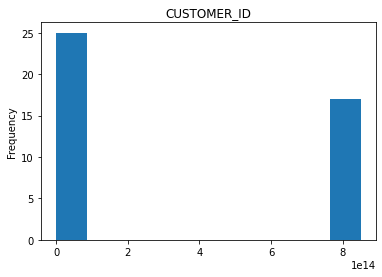

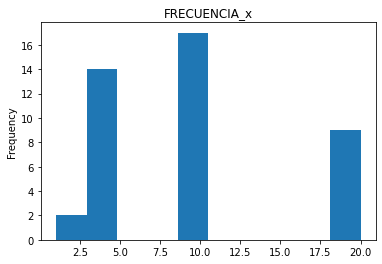

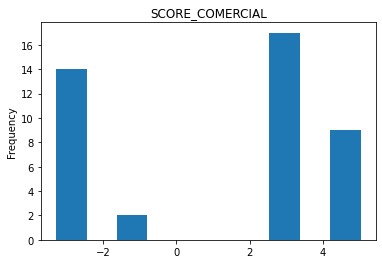

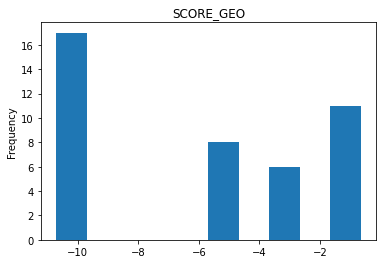

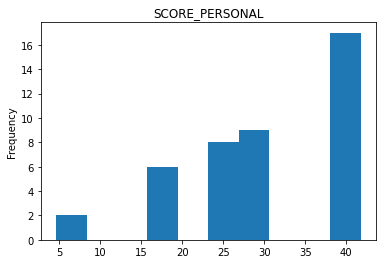

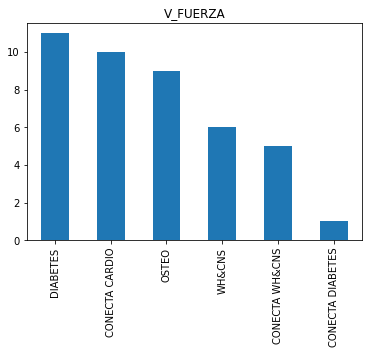

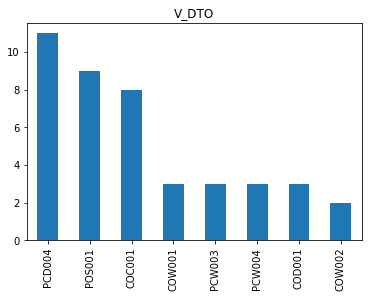

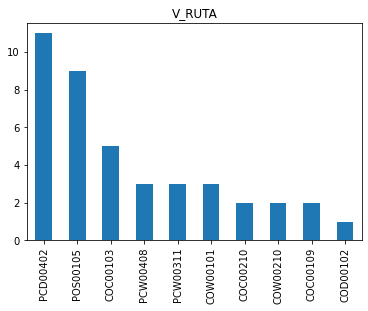

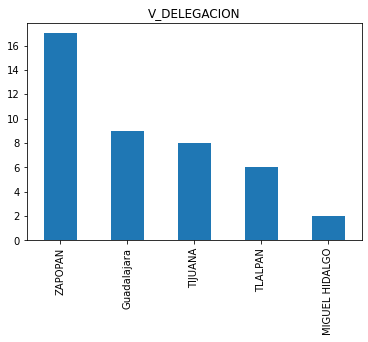

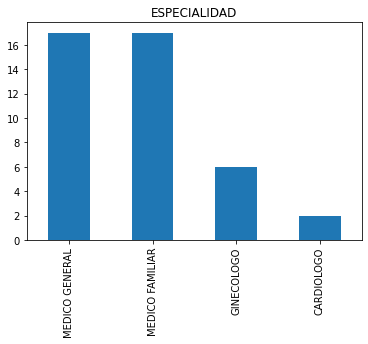

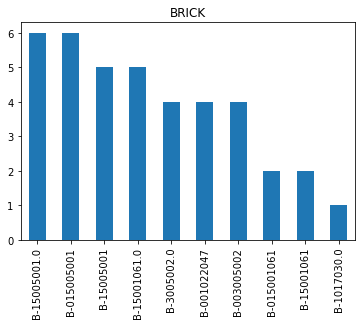

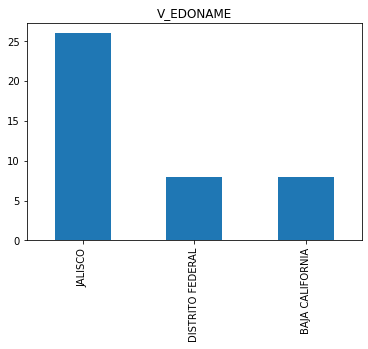

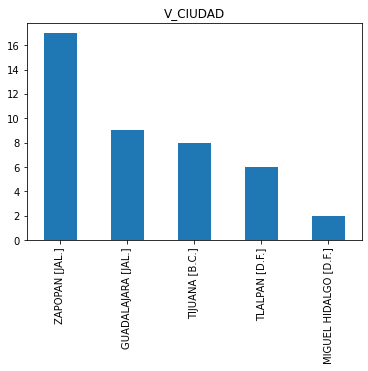

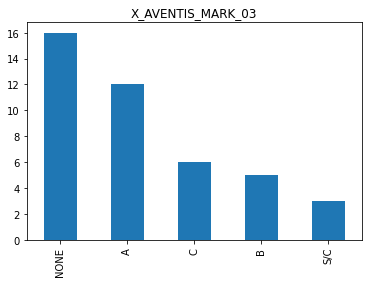

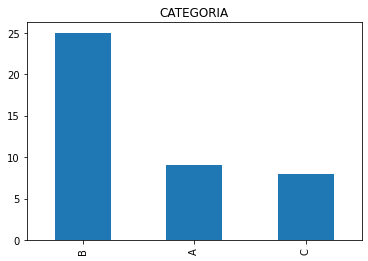

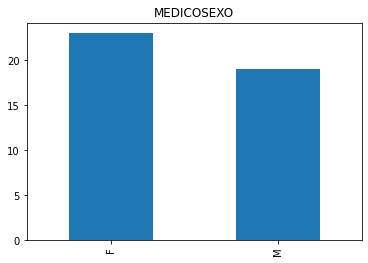

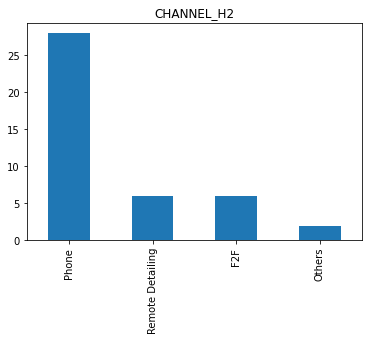

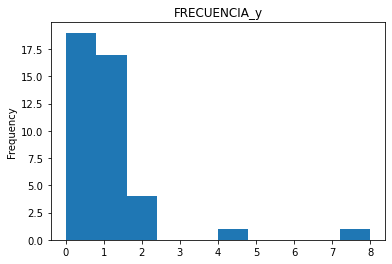

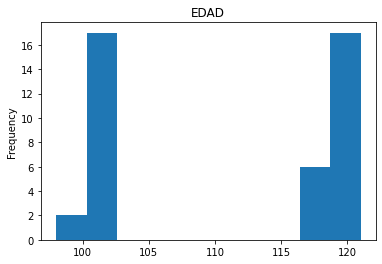

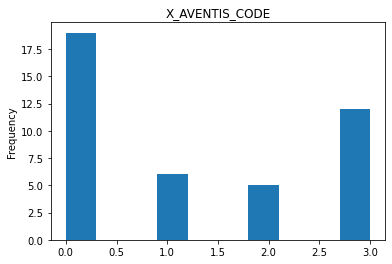

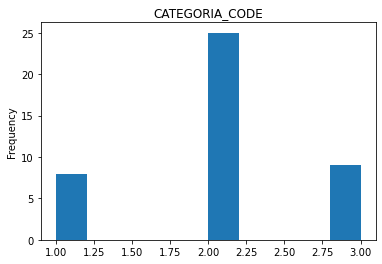

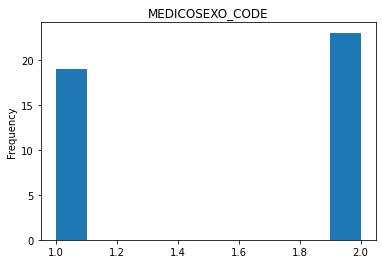

In [128]:
for column in dfSDClusterPersonalUpper:
    plt.figure(column)
    plt.title(column)
    if ptypes.is_numeric_dtype(dfSDClusterPersonalUpper[column]):
        dfSDClusterPersonalUpper[column].plot(kind = 'hist')
    elif ptypes.is_string_dtype(dfSDClusterPersonalUpper[column]):
        ### show only top 10 value count in each categorical data
        dfSDClusterPersonalUpper[column].value_counts()[:10].plot(kind = 'bar')

Del cluster superior en PERSONAL es posible observar lo siguiente:

- La FRECUENCIA de visitas está concentrada al rededor del 10

- Las principales FUERZAS DE VENTAS son: Diabetes, Conecta Cardio, Osteo, WH, Conecta WH y Conecta Diabetes

- Los principales 5 DISTRITOS son: PCD004, POS001, COC001, COW001, PCW003

- Las principales RUTAS son: PCD00402, POS00105, COC00103, PCW00408, PCW00311

- Las principales DELEGACIONES son: Zapopan, Guadalajara, Tijuana, Tlalpan y Miguel Hidalgo

- Las principales ESPECIALIDADES son: MG, MF, Ginecólogo, Cardiólogo

- Los principales BRICKs son: B-15005001, B-15001061, B-3005002, B-001022047, B-1017030

- Los principales ESTADOS son: Jalisco, CDMX y Baja California

- Las principales CATEGORÍAS son: B, A, C

- Existe una distribución equitativa en cuanto a GENERO

- Los principales CANALES son: Phone, Remote Detailing, F2F, Others


<ipython-input-129-e7a3e108c900>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(column)


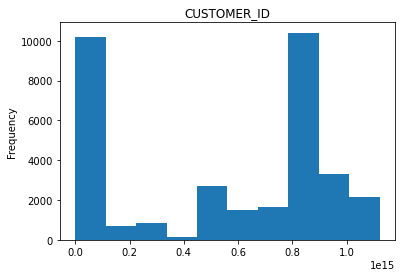

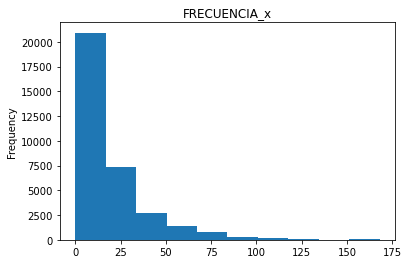

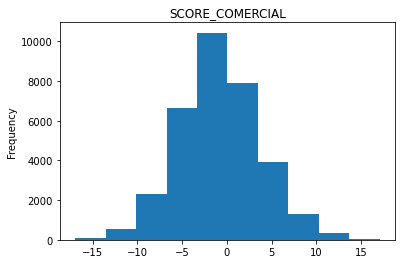

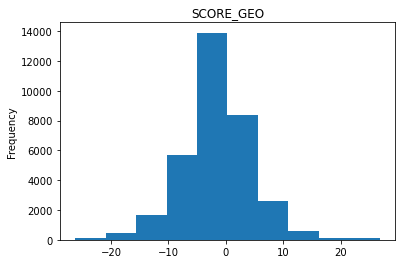

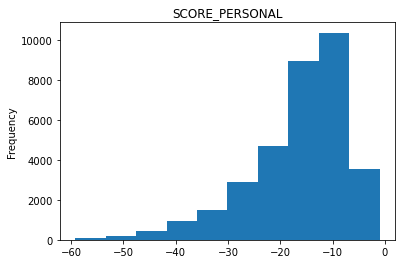

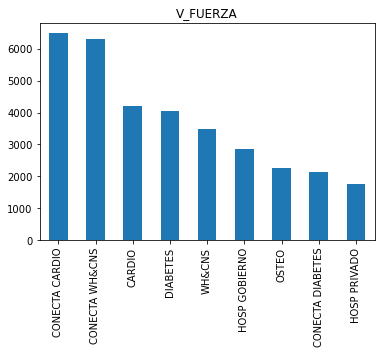

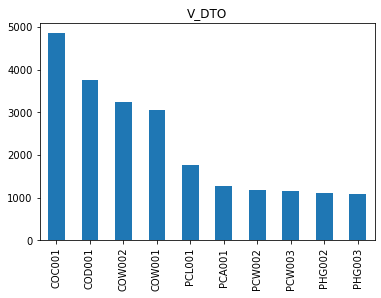

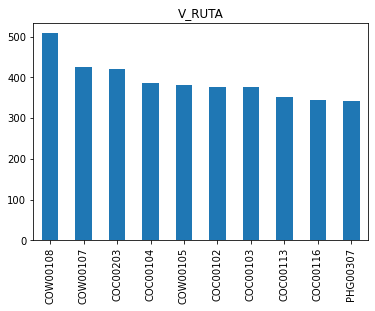

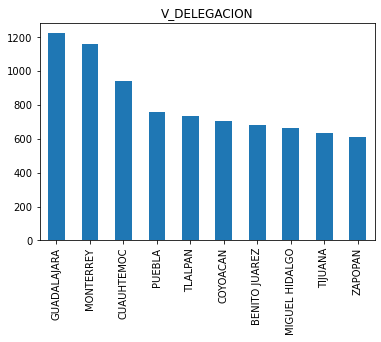

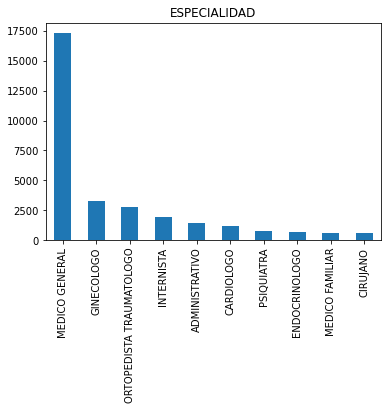

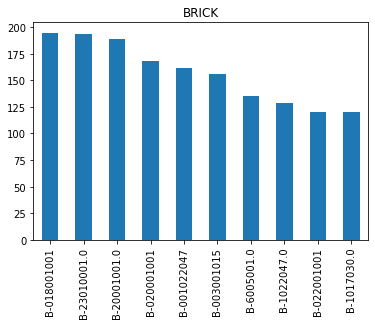

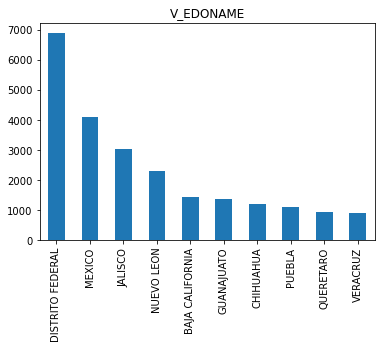

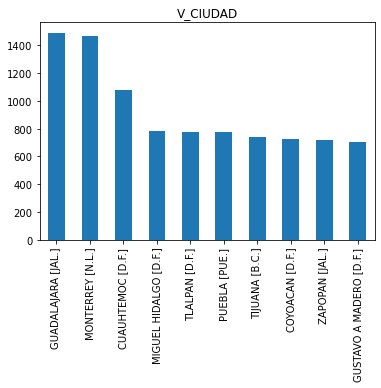

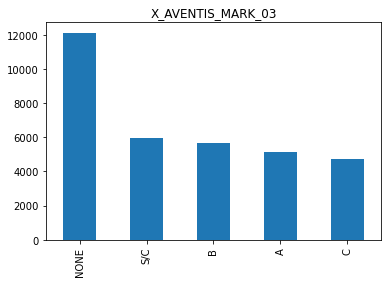

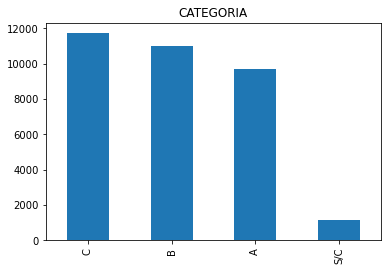

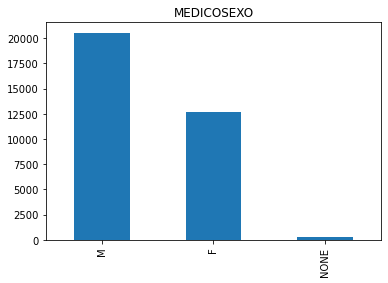

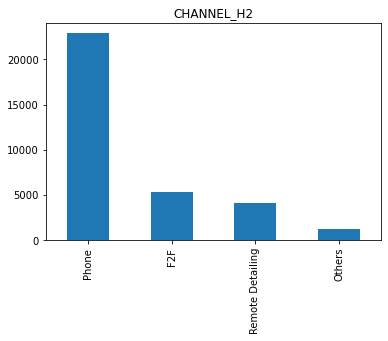

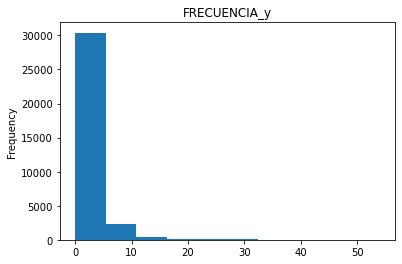

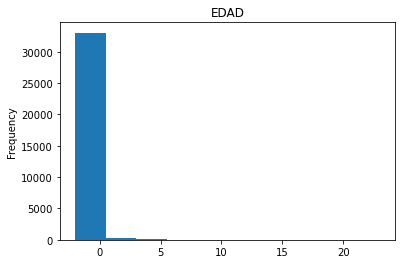

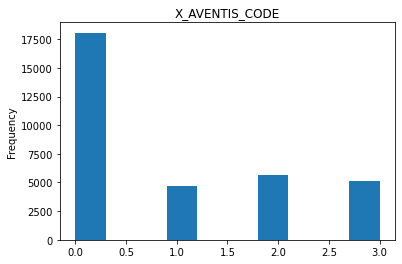

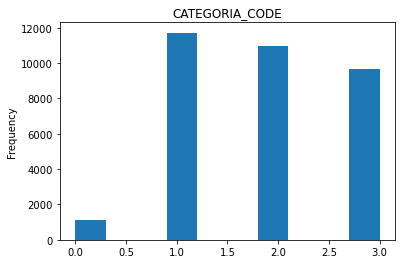

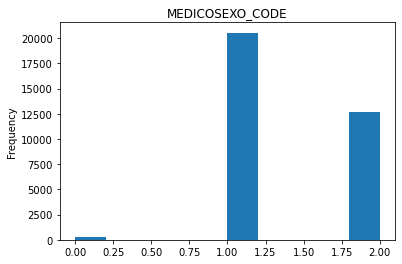

In [129]:
for column in dfSDClusterPersonalLower:
    plt.figure(column)
    plt.title(column)
    if ptypes.is_numeric_dtype(dfSDClusterPersonalLower[column]):
        dfSDClusterPersonalLower[column].plot(kind = 'hist')
    elif ptypes.is_string_dtype(dfSDClusterPersonalLower[column]):
        ### show only top 10 value count in each categorical data
        dfSDClusterPersonalLower[column].value_counts()[:10].plot(kind = 'bar')

Del cluster inferior en PERSONAL es posible observar lo siguiente:

- La FRECUENCIA de visitas está concentrada antes del 25

- El SCORE COMERCIAL tiene una distribución normal

- Las principales FUERZAS DE VENTAS son: Conecta Cardio, Conecta WH, Cardio, Diabetes, WH y Hosp. Gobierno

- Los principales 5 DISTRITOS son: COC001, COD001, COW002, COW001, PCL001

- Las principales RUTAS son: COW00108, COW00107, COC00203, COC00104, COW00105

- Las principales DELEGACIONES son: Guadalajara, Monterrey, Cuahutemoc, Puebla y Tlalpan

- Las principales ESPECIALIDADES son: MG, Ginecólogo, Ortopedista Traumatólogo, Internista

- Los principales BRICKs son: B-018001001, B-23010001, B-20001001, B-001022047, B-003001015

- Los principales ESTADOS son: CDMX, Estado de México, Jalisco, Nuevo León, Baja California

- Las principales CATEGORÍAS son: C, B, A

- En cuanto a GÉNERO, principalmente tenemos mujeres

- Los principales CANALES son: Phone, F2F, Remote Detailing Others

- Prácticamente no se poseen datos de EDAD


### Vector Geográfico

<ipython-input-131-6802930a0d42>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(column)


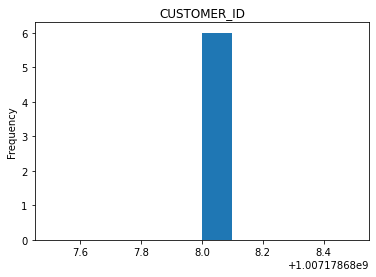

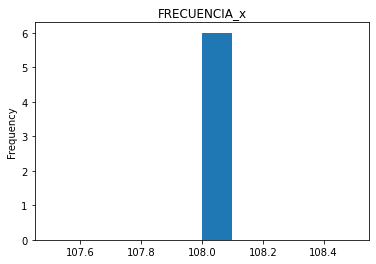

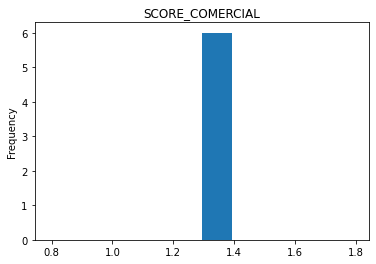

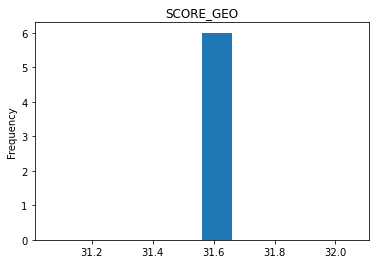

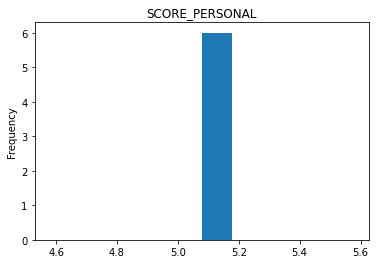

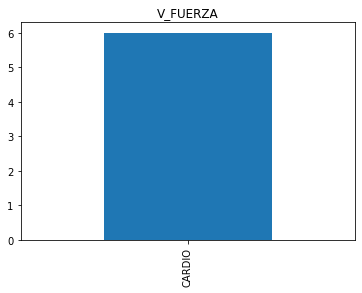

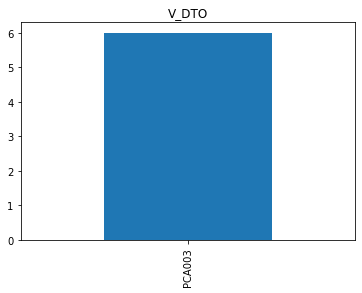

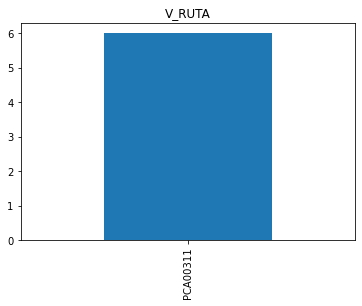

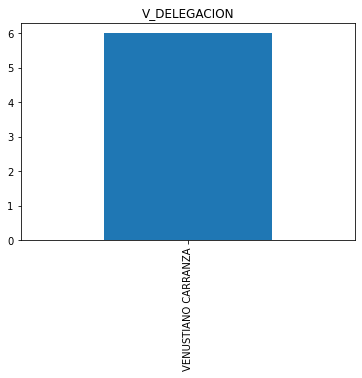

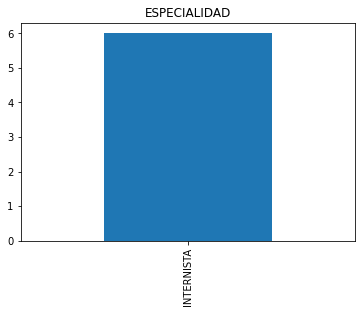

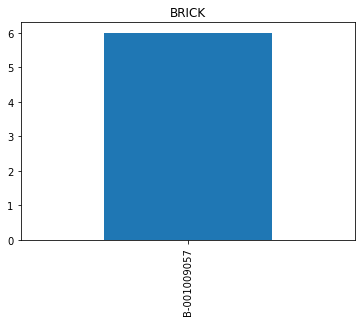

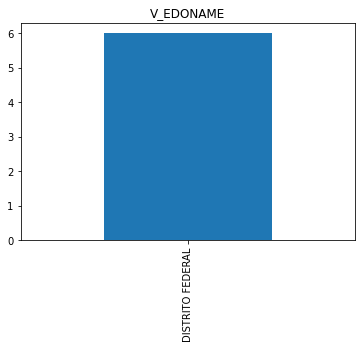

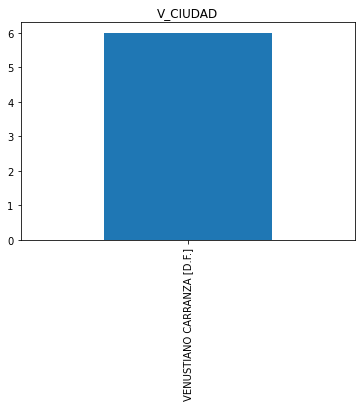

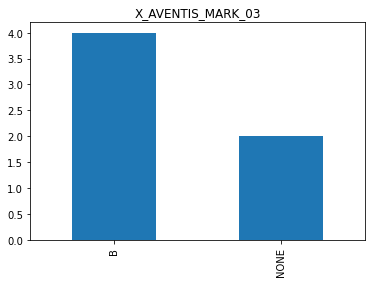

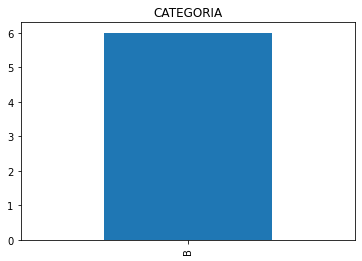

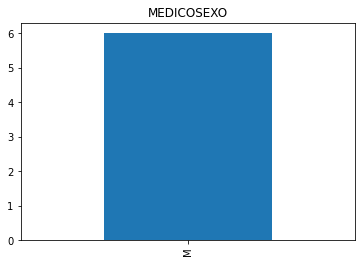

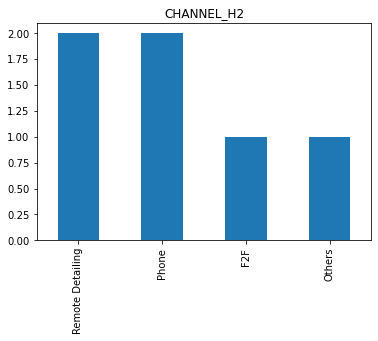

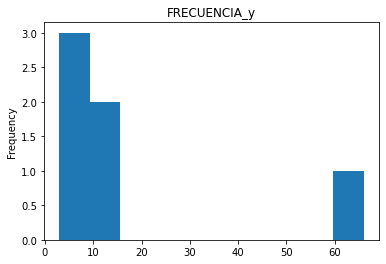

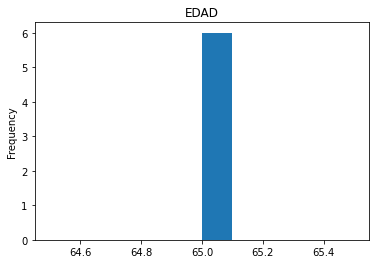

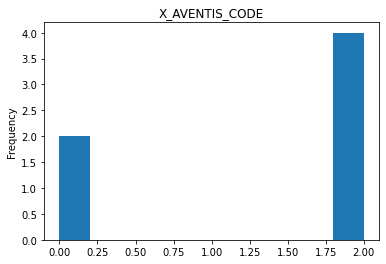

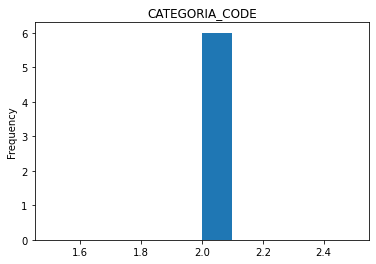

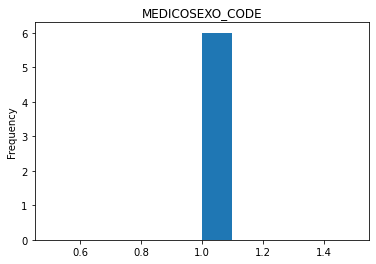

In [131]:
for column in dfSDClusterGeo:
    plt.figure(column)
    plt.title(column)
    if ptypes.is_numeric_dtype(dfSDClusterGeo[column]):
        dfSDClusterGeo[column].plot(kind = 'hist')
    elif ptypes.is_string_dtype(dfSDClusterGeo[column]):
        ### show only top 10 value count in each categorical data
        dfSDClusterGeo[column].value_counts()[:10].plot(kind = 'bar')

Del cluster superior GEOGRÁFICO es posible observar lo siguiente:

- La principal FUERZAS DE VENTAS es Cardio

- El principal DISTRITO es: PCA003

- La principal RUTA es: PCA00311

- La principal DELEGACION es: Venustiano Carranza

- La principal ESPECIALIDAD es: Internista

- El principal BRICK es: B-001009057

- El principal ESTADO es: CDMX

- La principal CATEGORÍA es:  B

- En cuanto a GÉNERO es un doctor masculino

- Los principales CANALES son: Remote Detailing, Phone, F2F, Others

- Tiene 65 años de EDAD


### Vector Comercial

<ipython-input-132-438aae807f89>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(column)


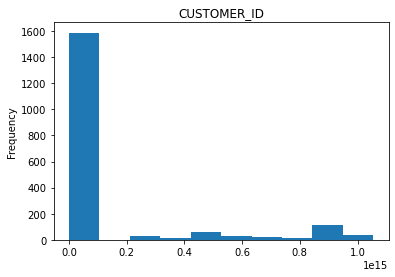

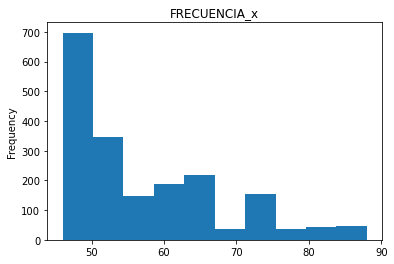

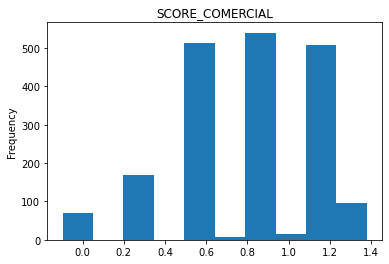

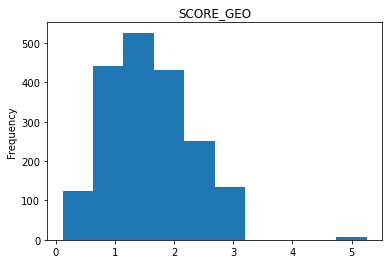

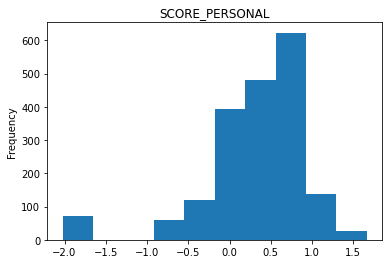

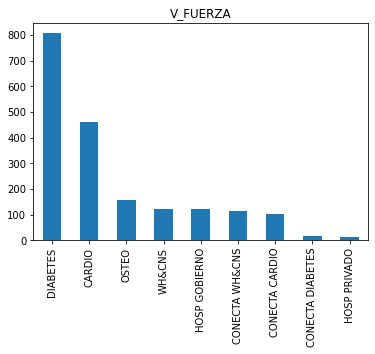

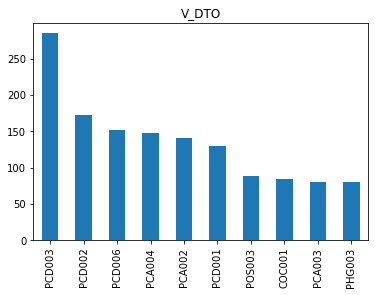

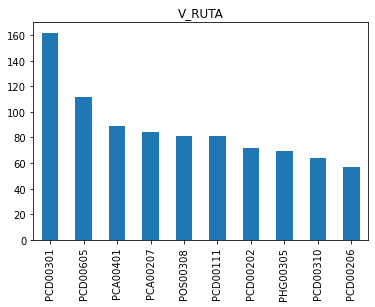

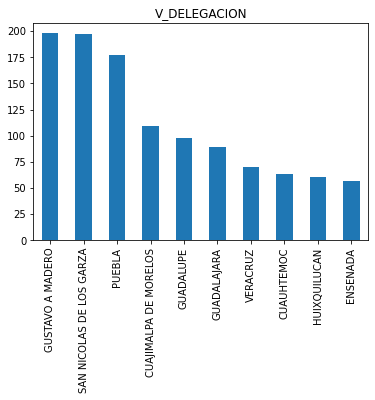

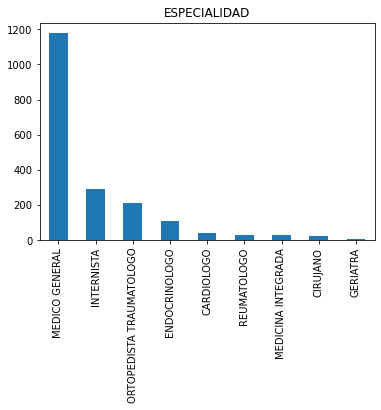

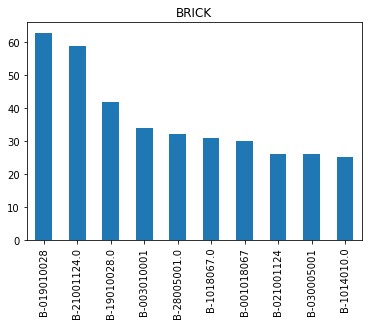

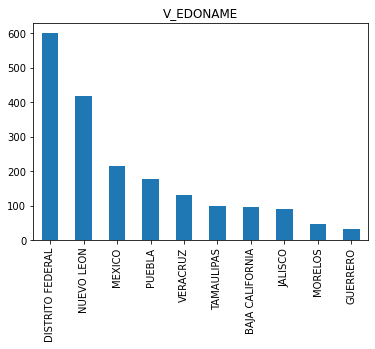

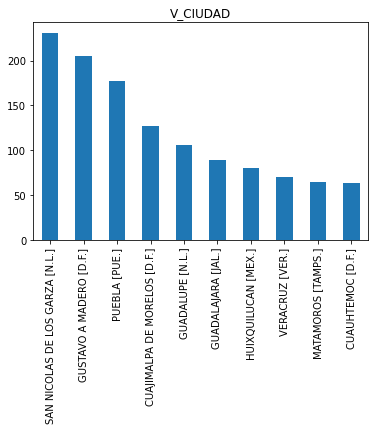

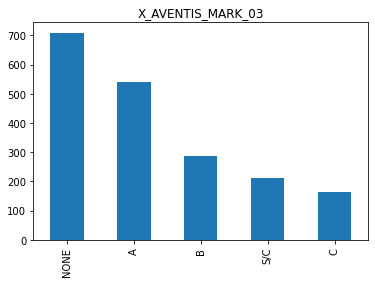

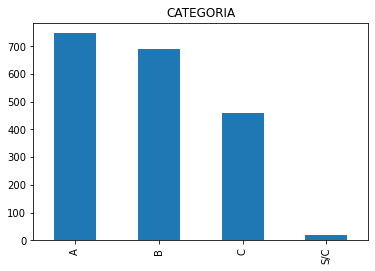

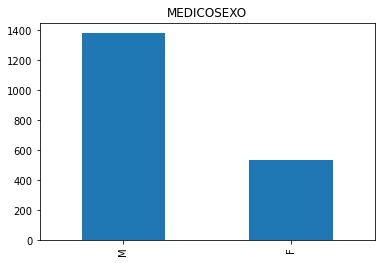

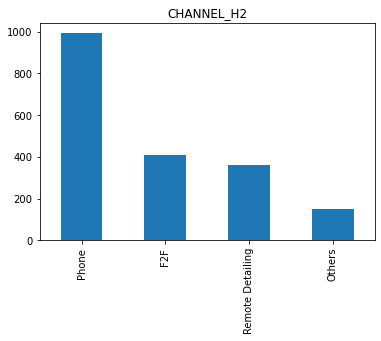

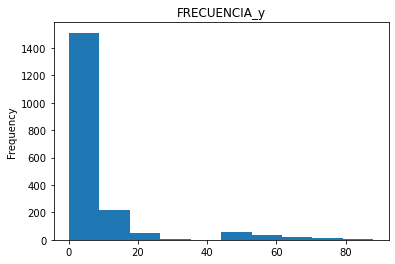

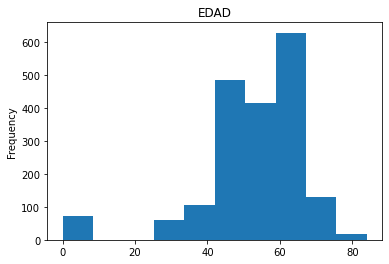

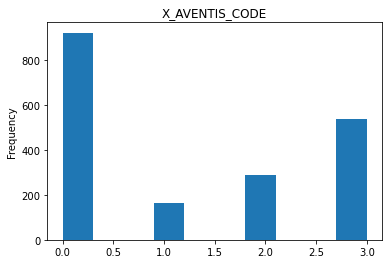

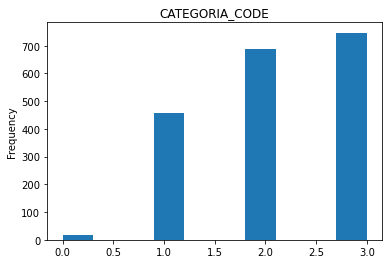

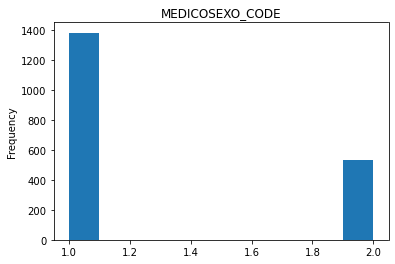

In [132]:
for column in dfSDClusterComercial:
    plt.figure(column)
    plt.title(column)
    if ptypes.is_numeric_dtype(dfSDClusterComercial[column]):
        dfSDClusterComercial[column].plot(kind = 'hist')
    elif ptypes.is_string_dtype(dfSDClusterComercial[column]):
        ### show only top 10 value count in each categorical data
        dfSDClusterComercial[column].value_counts()[:10].plot(kind = 'bar')

Del cluster superior COMERCIAL es posible observar lo siguiente:

- La FRECUENCIA de visitas está concentrada antes del 50

- Las principales FUERZAS DE VENTAS son: Diabetes, Cardio, Osteo, WH, Hosp. Gobierno

- Los principales 5 DISTRITOS son: PCD003, PCD002, PCD006, PCA004, PCA002

- Las principales RUTAS son: PCD00301, PCD00605, PCA00207, POS00308, PCD00111

- Las principales DELEGACIONES son: Gustavo A. Madero, San Nicolas de los Garza, Puebla, Cuajimalpa y Guadalupe

- Las principales ESPECIALIDADES son: MG, Internista, Ortopedista Traumatólogo, Endocrinólogo, Cardiologo

- Los principales BRICKs son: B-019010028, B-21001124, B-19010028, B-00301001, B-28005001

- Los principales ESTADOS son: CDMX, Nuevo León, Edo. Mex., Puebla, Veracruz

- Las principales CATEGORÍAS son: A, B, C

- En cuanto a GÉNERO, principalmente tenemos Másculino

- Los principales CANALES son: Phone, F2F, Remote Detailing Others

- La EDAD se concentra al rededor de los 60 años


Es conveniente saber si tenemos médicos que se encuentren en al menos dos de nuestros 3 vectores definidos:

In [133]:
dfNormalizedID.columns

Index(['V_FUERZA', 'V_DTO', 'V_RUTA', 'ESPECIALIDAD', 'BRICK', 'V_EDONAME',
       'V_CIUDAD', 'CHANNEL_H2', 'EDAD', 'X_AVENTIS_CODE', 'CATEGORIA_CODE',
       'MEDICOSEXO_CODE', 'CUSTOMER_ID', 'FRECUENCIA', 'Z_RUTA', 'Z_BRICK',
       'Z_DTO', 'Z_CIUDAD', 'Z_EDONAME', 'Z_EDAD', 'Z_ESPECIALIDAD',
       'Z_MEDICOSEXO', 'Z_X_AVENTIS', 'Z_CATEGORIA', 'Z_FUERZA', 'Z_CHANNEL',
       'SCORE_GEO', 'SCORE_PERSONAL', 'SCORE_COMERCIAL'],
      dtype='object')

## K-Means

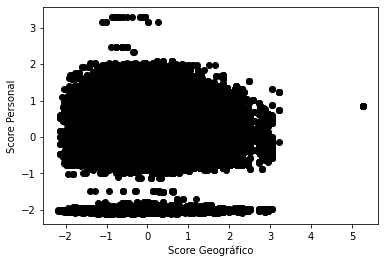

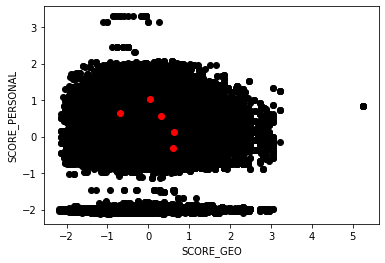

<Figure size 432x288 with 0 Axes>

RECOMPUTING


<ipython-input-134-586a9269212d>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-134-586a9269212d>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


-1.048675104111844
-0.7748815163944458
-0.3251584922060483
-0.08735348713220409
-0.0394067938855165
-0.01943375555705598
-0.011384962415540344
-0.006580427186655476
-0.0032131759006851918
-0.0015702760058883408
-0.0011241862972077524
-0.0008522747661377939
-0.0005612416953965187
0.0010356274695756187
0.0017634685737088003
0.0012485781506062846
0.001355179682536534
0.0008800493246589481
0.001724000582864267
0.0017017210946837433
0.0013550402221816603
0.0015242342190236943
0.0015567020718914547
0.00077737582652352
0.0010816065333688896
0.0007474438967079514
0.0012925244102148618
0.0009295467188498996
0.0007153976421601718
0.0005772310725554661
-0.00015866987775833147
-0.0001899695992828715
0.00010792348738136726
0.00030459913605433014
0.0006114233748827566
0.0004450559391533451
0.0006516425405637752
0.0004822700321757689
0.0002697457415942045
0.00016977830740221023
0.0003368098488504903
0.00012033307338809446
0.0004280951749451867
0.00045180303633696184
6.846788343153193e-05
0.0003941145

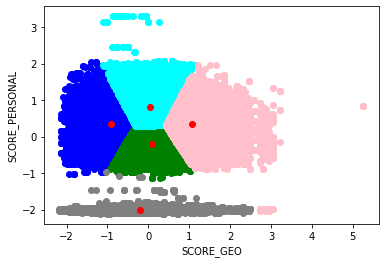

In [134]:
X = dfNormalizedID[["SCORE_GEO","SCORE_PERSONAL", "SCORE_COMERCIAL"]]
#Visualise data points
plt.scatter(X["SCORE_GEO"],X["SCORE_PERSONAL"],c='black')
plt.xlabel('Score Geográfico')
plt.ylabel('Score Personal')
plt.show()

# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=5

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["SCORE_GEO"],X["SCORE_PERSONAL"],c='black')
plt.scatter(Centroids["SCORE_GEO"],Centroids["SCORE_PERSONAL"],c='red')
plt.xlabel('SCORE_GEO')
plt.ylabel('SCORE_PERSONAL')
plt.show()
fig1 = plt.gcf()
plt.draw()
plt.show()


# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

print('RECOMPUTING')

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["SCORE_GEO"]-row_d["SCORE_GEO"])**2
            d2=(row_c["SCORE_PERSONAL"]-row_d["SCORE_PERSONAL"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["SCORE_PERSONAL","SCORE_GEO"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['SCORE_PERSONAL'] - Centroids['SCORE_PERSONAL']).sum() + (Centroids_new['SCORE_GEO'] - Centroids['SCORE_GEO']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["SCORE_PERSONAL","SCORE_GEO"]]


color=['blue','green','cyan','gray','pink']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["SCORE_GEO"],data["SCORE_PERSONAL"],c=color[k])
plt.scatter(Centroids["SCORE_GEO"],Centroids["SCORE_PERSONAL"],c='red')
plt.xlabel('SCORE_GEO')
plt.ylabel('SCORE_PERSONAL')
plt.show()


X.to_csv('C:/Users/I0473941/OneDrive - Sanofi/2021/Data/KMeans_Geo_Personal.csv',index=False)


## Food 4 thought

1. **¿Debería tener data de médicos únicos de VISITAS?**

2. **Añadir RTE**

3. **Explorar Deciles**

4. Mail a Quan sobre hosting en Magellan **(DONE)**

5. **CHatbot**